## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

from pandas.plotting import table

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading Data

In [3]:
y1_data= pd.read_csv('year1.csv')
y2_data = pd.read_csv('year2.csv')
validation_data= pd.read_csv('year3.csv')


In [4]:
y1_data.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
0,1,2697762.0,93.800003,5782,5738,ball,R,R,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82
1,1,2697773.0,95.599998,5782,5738,foul,R,R,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56
2,1,2697902.0,94.800003,5782,5842,foul,R,R,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56
3,1,2697993.0,87.300003,5782,5041,ball,R,R,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73
4,1,2697995.0,98.599998,5782,5041,called_strike,R,R,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70


In [5]:
y2_data.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
0,2,3398682.0,93.000000,6351,5763,ball,L,R,FF,2,1,-1.08,0.68,-1.04,4.14,3.30,1.48
1,2,3398692.0,87.800003,6351,5763,ball,L,R,SL,3,2,0.80,0.06,2.16,1.38,3.32,1.51
2,2,3398660.0,87.099998,6859,6222,ball,R,R,SL,1,0,0.49,0.44,0.05,3.53,3.23,1.47
3,2,3398685.0,94.400002,6859,6222,called_strike,R,R,FF,3,1,-0.50,1.39,0.70,2.19,3.20,1.33
4,2,3398652.0,88.300003,6411,6222,called_strike,L,R,CH,0,0,-0.98,0.30,0.51,2.15,3.66,1.74


In [6]:
validation_data.head()

,season,pitch_id,release_speed,batter,pitcher,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
0,3,4135978.0,78.800003,5464,6936,L,R,ST,1,1,1.11,0.30,-0.33,0.49,3.58,1.66
1,3,4135989.0,93.699997,5464,6936,L,R,FF,2,2,-1.16,1.36,-1.57,2.49,3.58,1.69
2,3,4135993.0,94.199997,5464,6936,L,R,FF,3,2,-1.24,1.26,-1.31,3.48,3.68,1.69
3,3,4131576.0,91.199997,6446,6727,R,R,FF,0,0,-1.03,1.38,1.02,2.31,3.29,1.58
4,3,4131602.0,84.500000,5667,6727,R,R,SL,3,2,0.20,0.12,0.61,1.36,3.41,1.63


In [7]:
y1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709852 entries, 0 to 709851
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   season         709852 non-null  int64  
 1   pitch_id       708471 non-null  float64
 2   release_speed  709485 non-null  float64
 3   batter         709852 non-null  int64  
 4   pitcher        709852 non-null  int64  
 5   description    709852 non-null  object 
 6   stand          709852 non-null  object 
 7   p_throws       709852 non-null  object 
 8   pitch_type     709485 non-null  object 
 9   balls          709852 non-null  int64  
 10  strikes        709852 non-null  int64  
 11  pfx_x          706819 non-null  float64
 12  pfx_z          708792 non-null  float64
 13  plate_x        709485 non-null  float64
 14  plate_z        709452 non-null  float64
 15  sz_top         709485 non-null  float64
 16  sz_bot         709440 non-null  float64
dtypes: float64(8), int64(5), obje

In [8]:
y2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708540 entries, 0 to 708539
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   season         708540 non-null  int64  
 1   pitch_id       708310 non-null  float64
 2   release_speed  708128 non-null  float64
 3   batter         708540 non-null  int64  
 4   pitcher        708540 non-null  int64  
 5   description    708540 non-null  object 
 6   stand          708540 non-null  object 
 7   p_throws       708540 non-null  object 
 8   pitch_type     708167 non-null  object 
 9   balls          708540 non-null  int64  
 10  strikes        708540 non-null  int64  
 11  pfx_x          708113 non-null  float64
 12  pfx_z          708123 non-null  float64
 13  plate_x        708128 non-null  float64
 14  plate_z        708128 non-null  float64
 15  sz_top         708128 non-null  float64
 16  sz_bot         708128 non-null  float64
dtypes: float64(8), int64(5), obje

In [9]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717945 entries, 0 to 717944
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   season         717945 non-null  int64  
 1   pitch_id       716869 non-null  float64
 2   release_speed  717675 non-null  float64
 3   batter         717945 non-null  int64  
 4   pitcher        717945 non-null  int64  
 5   stand          717945 non-null  object 
 6   p_throws       717945 non-null  object 
 7   pitch_type     717676 non-null  object 
 8   balls          717945 non-null  int64  
 9   strikes        717945 non-null  int64  
 10  pfx_x          715110 non-null  float64
 11  pfx_z          717176 non-null  float64
 12  plate_x        712219 non-null  float64
 13  plate_z        717649 non-null  float64
 14  sz_top         715406 non-null  float64
 15  sz_bot         717630 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 87.6+ MB


In [10]:
# Convert the pitch_id columns from each dataset to sets
pitch_ids_year1 = set(y1_data['pitch_id'])
pitch_ids_year2 = set(y2_data['pitch_id'])

# Finding the intersection of these sets to get common pitch_ids
common_pitch_ids = pitch_ids_year1.intersection(pitch_ids_year2)

# Convert to list and print the common pitch_ids
common_pitch_ids_list = list(common_pitch_ids)
print(f"Common Pitch IDs between Year 1 and Year 2: {common_pitch_ids_list}")
print(f"Total common Pitch IDs: {len(common_pitch_ids_list)}")


Common Pitch IDs between Year 1 and Year 2: []
Total common Pitch IDs: 0


##  Combined the Data and called it Train Data

In [11]:
train_data = pd.concat([y1_data, y2_data], ignore_index=True)

# Display the first few rows of the combined dataset to verify
train_data.head()
# print(train_data.tail())  


,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot
0,1,2697762.0,93.800003,5782,5738,ball,R,R,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82
1,1,2697773.0,95.599998,5782,5738,foul,R,R,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56
2,1,2697902.0,94.800003,5782,5842,foul,R,R,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56
3,1,2697993.0,87.300003,5782,5041,ball,R,R,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73
4,1,2697995.0,98.599998,5782,5041,called_strike,R,R,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70


In [12]:
validation_data['pitch_type'].unique()

array(['ST', 'FF', 'SL', 'FC', 'CH', 'KC', 'SI', 'CU', 'FS', 'SV', 'CS',
       'SC', 'FO', 'FA', 'PO', nan, 'EP', 'KN'], dtype=object)

In [13]:
train_data['pitch_type'].unique()


array(['SI', 'FF', 'SL', 'KC', 'CH', 'CU', 'FC', 'ST', 'FS', 'CS', 'SV',
       'FA', 'PO', 'SC', 'EP', nan, 'KN'], dtype=object)

In [14]:
validation_data['pitch_type'].value_counts()


FF    230936
SL    126294
SI    110871
CH     78464
FC     55594
CU     51675
ST     30954
FS     15600
KC     12154
SV      2330
FA      1140
FO       778
EP       523
KN       190
SC        74
CS        53
PO        46
Name: pitch_type, dtype: int64

In [15]:
train_data['pitch_type'].value_counts()

FF    486374
SL    251511
SI    218325
CH    159557
CU    108924
FC    100982
KC     30805
ST     30403
FS     22517
SV      5092
FA      2105
EP       642
CS       252
KN        88
PO        74
SC         1
Name: pitch_type, dtype: int64

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418392 entries, 0 to 1418391
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   season         1418392 non-null  int64  
 1   pitch_id       1416781 non-null  float64
 2   release_speed  1417613 non-null  float64
 3   batter         1418392 non-null  int64  
 4   pitcher        1418392 non-null  int64  
 5   description    1418392 non-null  object 
 6   stand          1418392 non-null  object 
 7   p_throws       1418392 non-null  object 
 8   pitch_type     1417652 non-null  object 
 9   balls          1418392 non-null  int64  
 10  strikes        1418392 non-null  int64  
 11  pfx_x          1414932 non-null  float64
 12  pfx_z          1416915 non-null  float64
 13  plate_x        1417613 non-null  float64
 14  plate_z        1417580 non-null  float64
 15  sz_top         1417613 non-null  float64
 16  sz_bot         1417568 non-null  float64
dtypes: float

## Quality Reports of Data

In [17]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

def save_quality_report_as_image(df, filename):
    """
    Description: Saves the quality of data in terms of missing values, 
    unique numbers, datatypes etc., as an image.
    
    Arguments:
        df: DataFrame to analyze
        filename: Path or name of the file to save the image
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
    quality_df = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN', 'Nunique', 'Dtype'])
    
    # Creating a figure and an axis object
    fig, ax = plt.subplots(figsize=(12, 8))  # You can adjust the size as needed
    # Hide axes
    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)
    
    # Create table and save the image
    tab = table(ax, quality_df, loc='upper right', cellLoc='center', colWidths=[0.2]*len(quality_df.columns))
    tab.auto_set_font_size(False)
    tab.set_fontsize(12)  # Adjust font size to fit
    tab.scale(1.2, 1.2)  # Adjust scale to fit more rows or give more space
    plt.savefig(filename, bbox_inches='tight', dpi=200)  # Save as image
    plt.close(fig)  # Close the figure





In [18]:
quality_report(train_data)

,Total NaN,Percent of NaN,Nunique,Dtype
pfx_x,3460,0.243938,482,float64
pitch_id,1611,0.113579,1416781,float64
pfx_z,1477,0.104132,451,float64
sz_bot,824,0.058094,143,float64
plate_z,812,0.057248,999,float64
release_speed,779,0.054921,681,float64
sz_top,779,0.054921,181,float64
plate_x,779,0.054921,827,float64
pitch_type,740,0.052172,16,object
balls,0,0.000000,5,int64


In [19]:
save_quality_report_as_image(train_data, 'quality_reportBC_T.png')

In [20]:
quality_report(validation_data)

,Total NaN,Percent of NaN,Nunique,Dtype
plate_x,5726,0.797554,791,float64
pfx_x,2835,0.394877,456,float64
sz_top,2539,0.353648,171,float64
pitch_id,1076,0.149872,716869,float64
pfx_z,769,0.107111,429,float64
sz_bot,315,0.043875,135,float64
plate_z,296,0.041229,898,float64
release_speed,270,0.037607,683,float64
pitch_type,269,0.037468,17,object
season,0,0.000000,1,int64


In [21]:
save_quality_report_as_image(validation_data, 'quality_reportBC_T.png')

## Numerical DIstribution Plots

count    1.418392e+06
mean     1.499538e+00
std      5.000000e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: season, dtype: float64


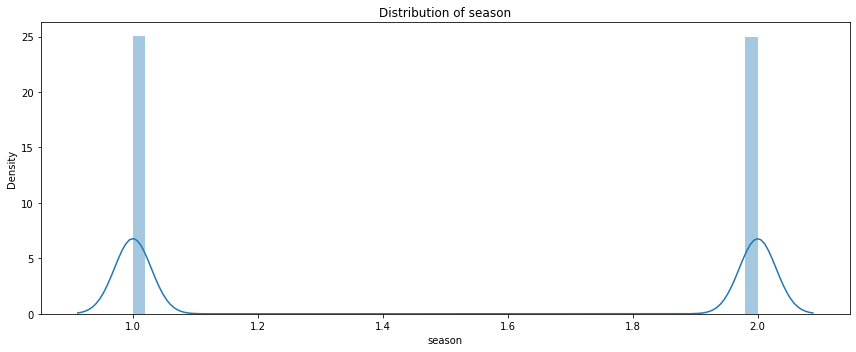

count    1.416781e+06
mean     2.709598e+06
std      4.094002e+05
min      2.000001e+06
25%      2.355116e+06
50%      2.709772e+06
75%      3.064189e+06
max      3.418392e+06
Name: pitch_id, dtype: float64


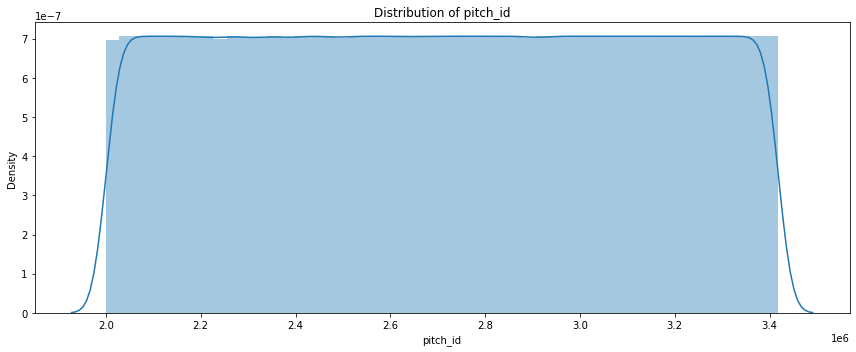

count    1.417613e+06
mean     8.886992e+01
std      6.101706e+00
min      3.010000e+01
25%      8.460000e+01
50%      8.980000e+01
75%      9.380000e+01
max      1.042000e+02
Name: release_speed, dtype: float64


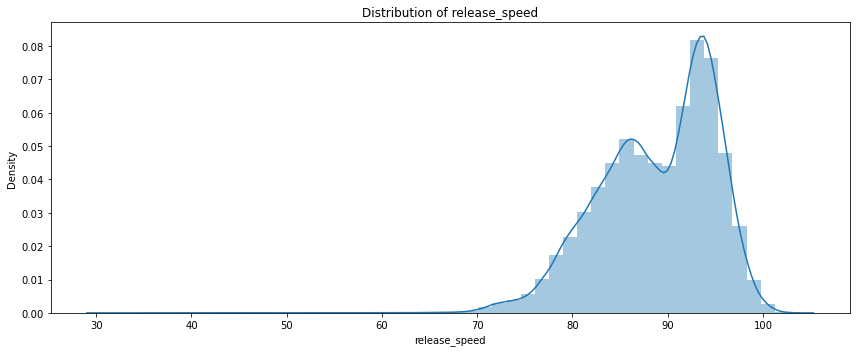

count    1.418392e+06
mean     5.873443e+03
std      5.578467e+02
min      5.001000e+03
25%      5.384000e+03
50%      5.829000e+03
75%      6.336000e+03
max      7.129000e+03
Name: batter, dtype: float64


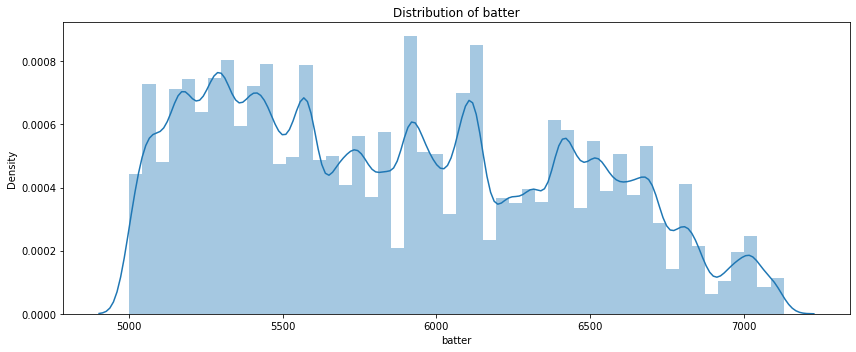

count    1.418392e+06
mean     5.869314e+03
std      5.524728e+02
min      5.001000e+03
25%      5.416000e+03
50%      5.802000e+03
75%      6.288000e+03
max      7.165000e+03
Name: pitcher, dtype: float64


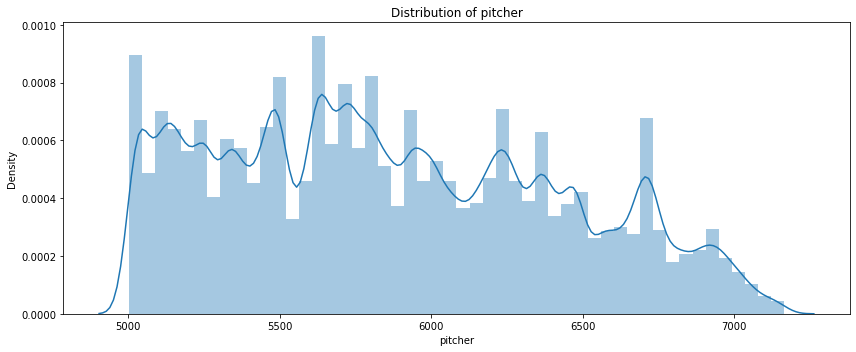

count    1.418392e+06
mean     8.787578e-01
std      9.661690e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.000000e+00
Name: balls, dtype: float64


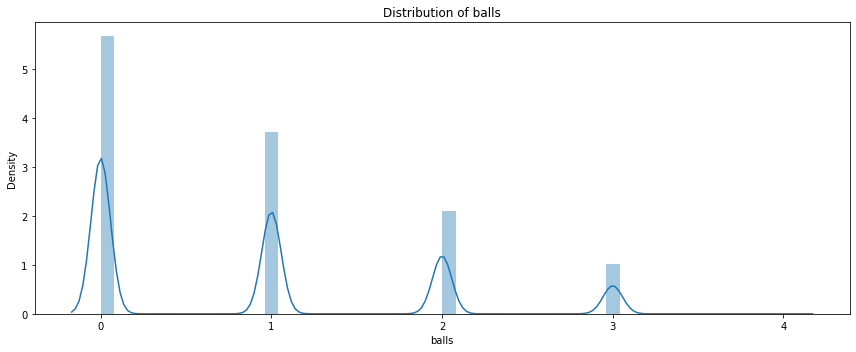

count    1.418392e+06
mean     8.969467e-01
std      8.282820e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.000000e+00
Name: strikes, dtype: float64


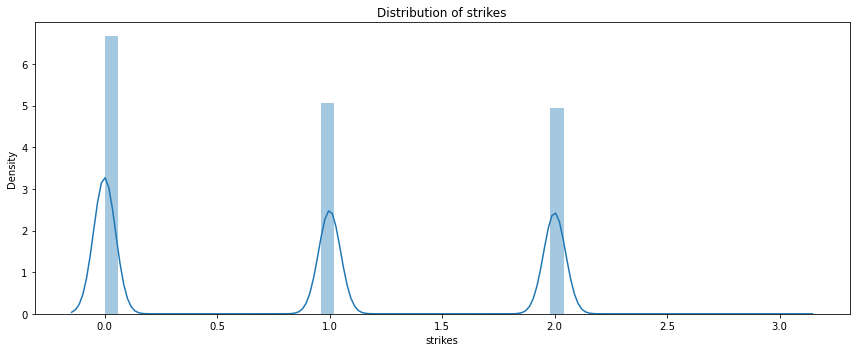

count    1.414932e+06
mean    -1.079710e-01
std      8.771834e-01
min     -2.870000e+00
25%     -8.500000e-01
50%     -1.700000e-01
75%      6.000000e-01
max      2.840000e+00
Name: pfx_x, dtype: float64


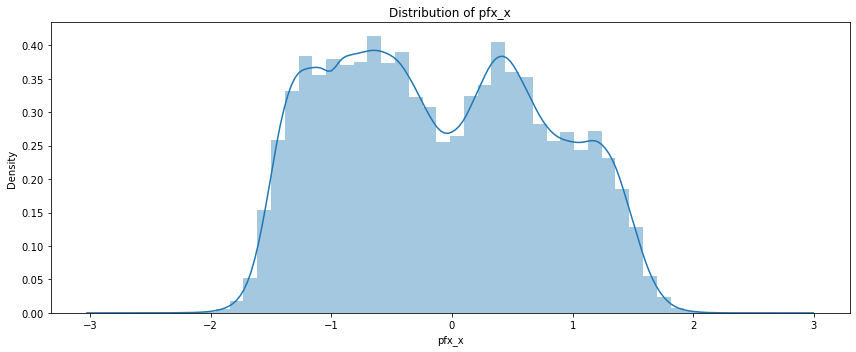

count    1.416915e+06
mean     6.406525e-01
std      7.452501e-01
min     -2.560000e+00
25%      1.800000e-01
50%      7.300000e-01
75%      1.270000e+00
max      2.820000e+00
Name: pfx_z, dtype: float64


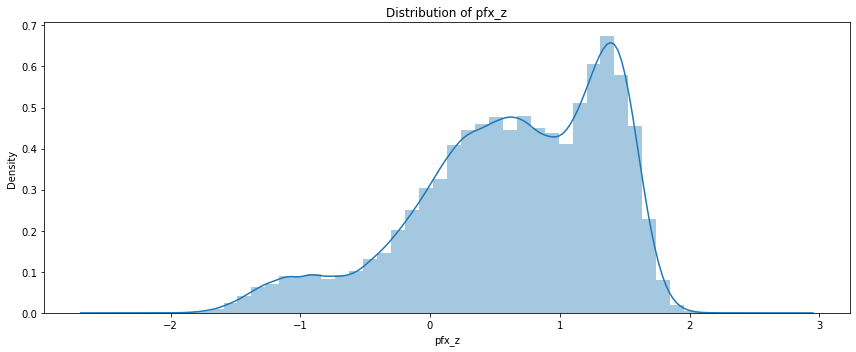

count    1.417613e+06
mean     4.263174e-02
std      8.437924e-01
min     -8.660000e+00
25%     -5.300000e-01
50%      4.000000e-02
75%      6.100000e-01
max      9.110000e+00
Name: plate_x, dtype: float64


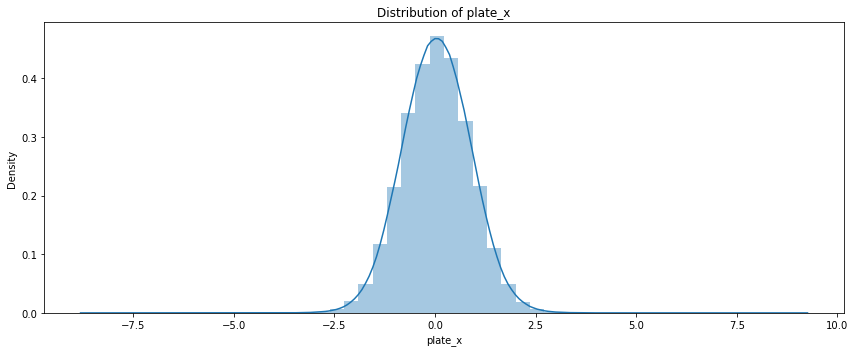

count    1.417580e+06
mean     2.282221e+00
std      9.772117e-01
min     -5.070000e+00
25%      1.650000e+00
50%      2.290000e+00
75%      2.930000e+00
max      1.022000e+01
Name: plate_z, dtype: float64


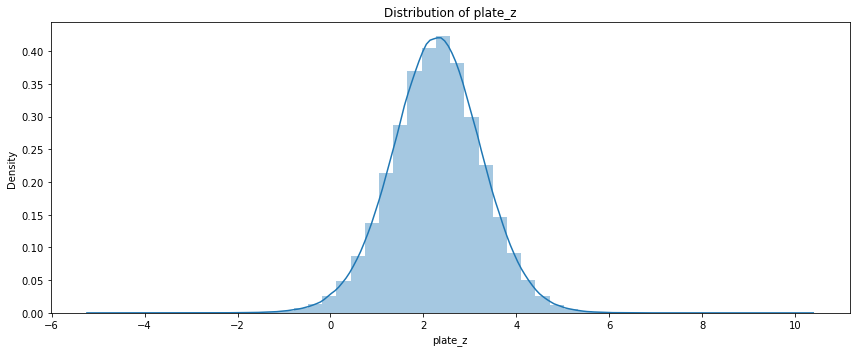

count    1.417613e+06
mean     3.387784e+00
std      1.770010e-01
min      2.500000e+00
25%      3.290000e+00
50%      3.390000e+00
75%      3.490000e+00
max      4.470000e+00
Name: sz_top, dtype: float64


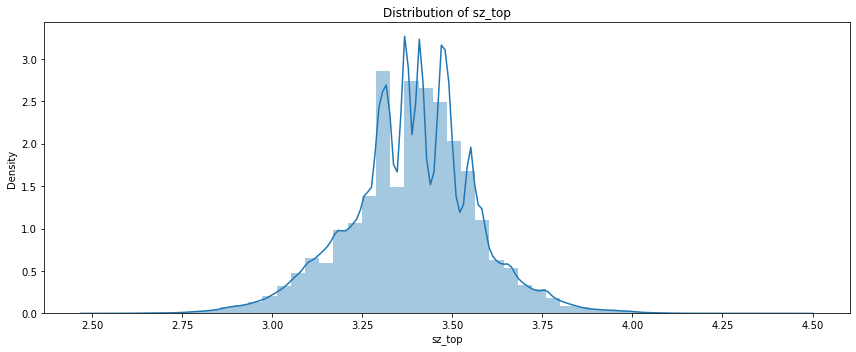

count    1.417568e+06
mean     1.586078e+00
std      1.007593e-01
min      7.700000e-01
25%      1.520000e+00
50%      1.590000e+00
75%      1.640000e+00
max      2.260000e+00
Name: sz_bot, dtype: float64


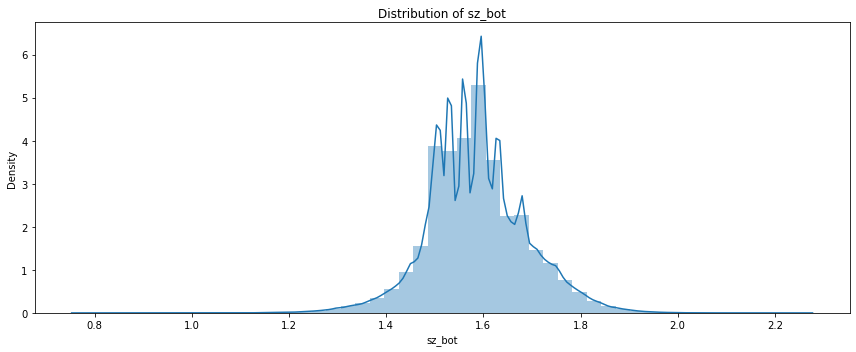

In [22]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()
numeric_distribution_plot(train_data)

count    717945.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: season, dtype: float64


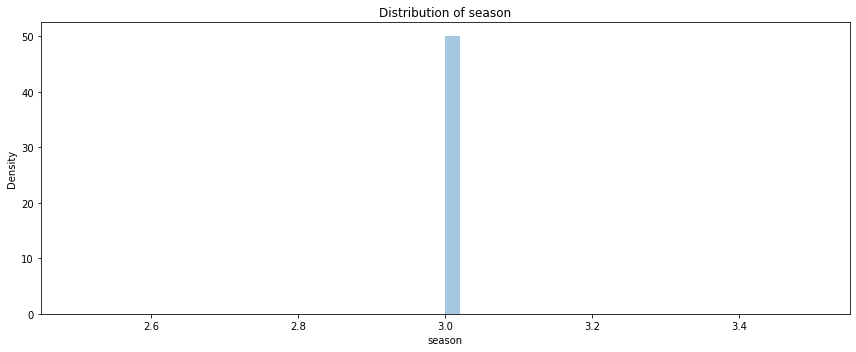

count    7.168690e+05
mean     3.777496e+06
std      2.072847e+05
min      3.418393e+06
25%      3.598018e+06
50%      3.777706e+06
75%      3.956924e+06
max      4.136337e+06
Name: pitch_id, dtype: float64


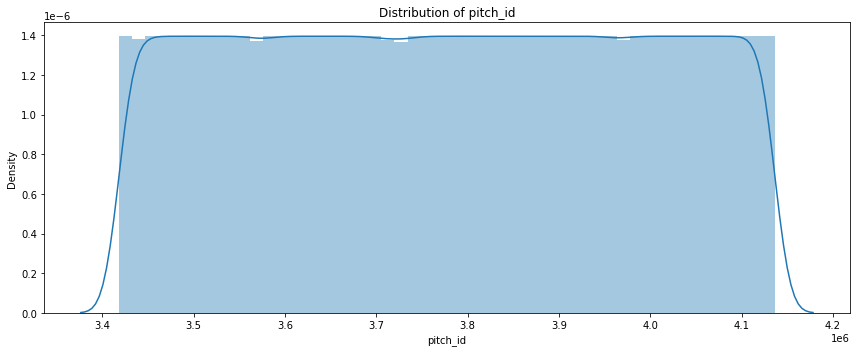

count    717675.000000
mean         88.999154
std           6.109362
min          33.400002
25%          84.599998
50%          89.800003
75%          93.900002
max         104.800003
Name: release_speed, dtype: float64


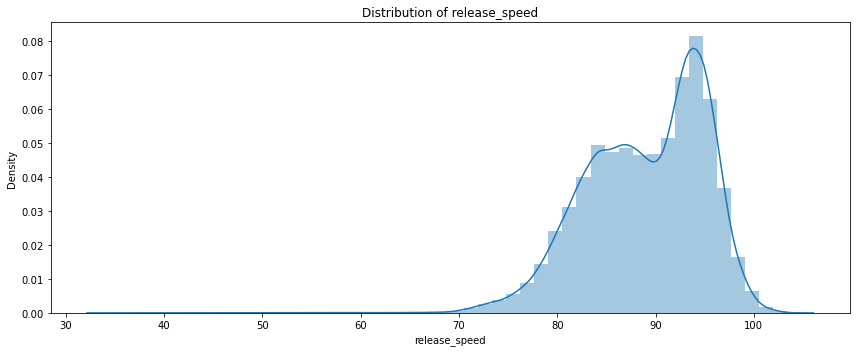

count    717945.000000
mean       6164.621426
std         620.605782
min        5002.000000
25%        5605.000000
50%        6224.000000
75%        6681.000000
max        7179.000000
Name: batter, dtype: float64


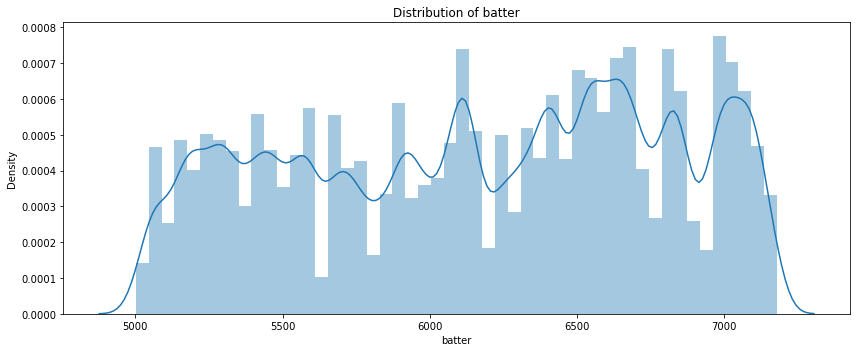

count    717945.000000
mean       6097.663824
std         617.766544
min        5006.000000
25%        5591.000000
50%        6120.000000
75%        6637.000000
max        7178.000000
Name: pitcher, dtype: float64


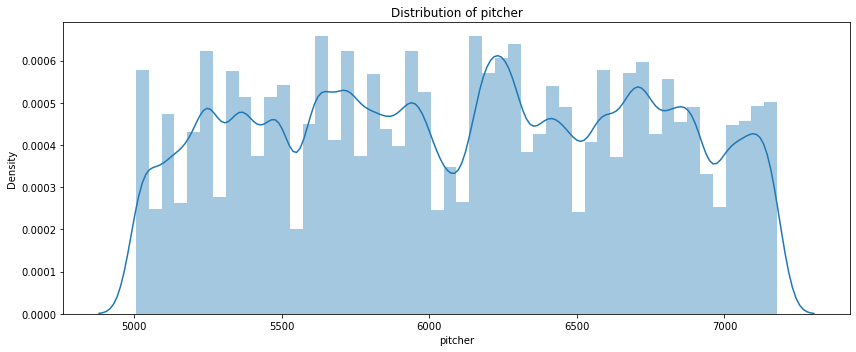

count    717945.000000
mean          0.879438
std           0.967713
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: balls, dtype: float64


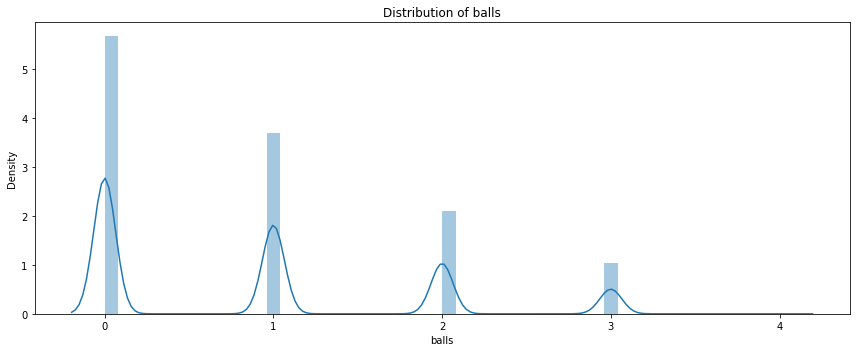

count    717945.000000
mean          0.901611
std           0.828033
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           2.000000
Name: strikes, dtype: float64


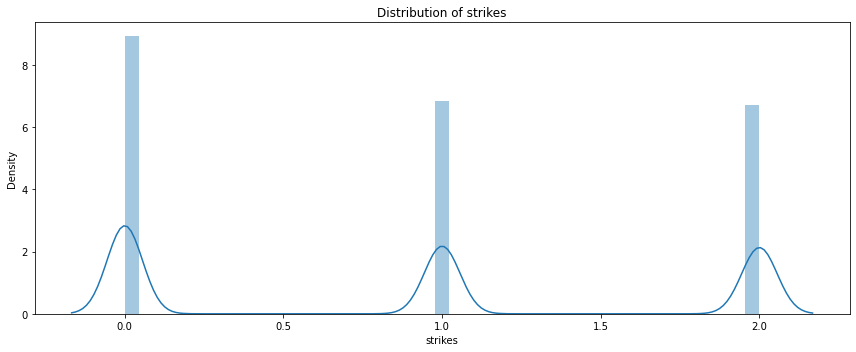

count    715110.000000
mean         -0.121776
std           0.893715
min          -2.580000
25%          -0.880000
50%          -0.180000
75%           0.580000
max           2.360000
Name: pfx_x, dtype: float64


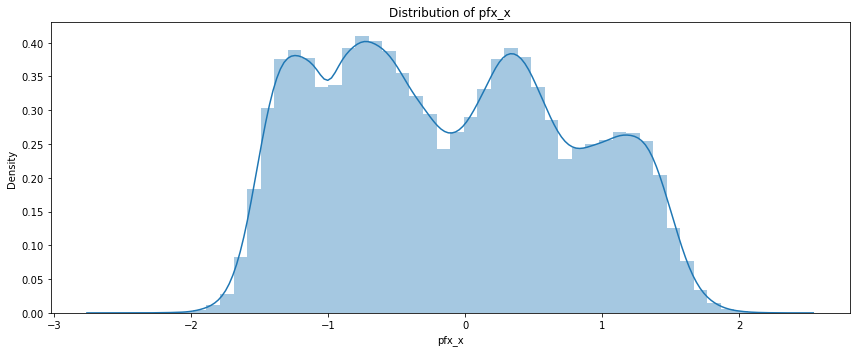

count    717176.000000
mean          0.591464
std           0.710215
min          -2.140000
25%           0.140000
50%           0.640000
75%           1.200000
max           2.840000
Name: pfx_z, dtype: float64


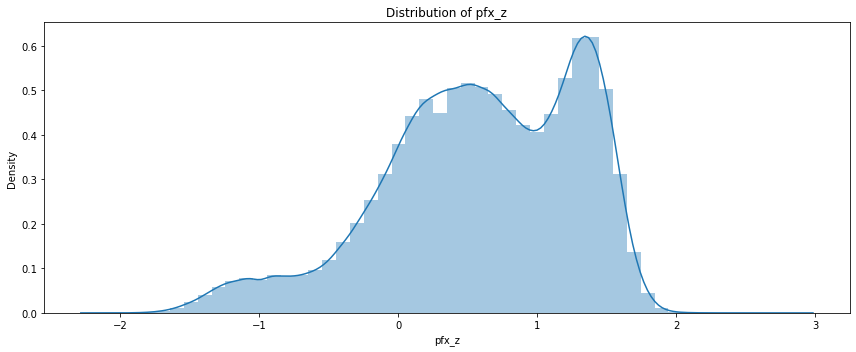

count    712219.000000
mean          0.032756
std           0.834155
min         -11.370000
25%          -0.530000
50%           0.030000
75%           0.590000
max           5.690000
Name: plate_x, dtype: float64


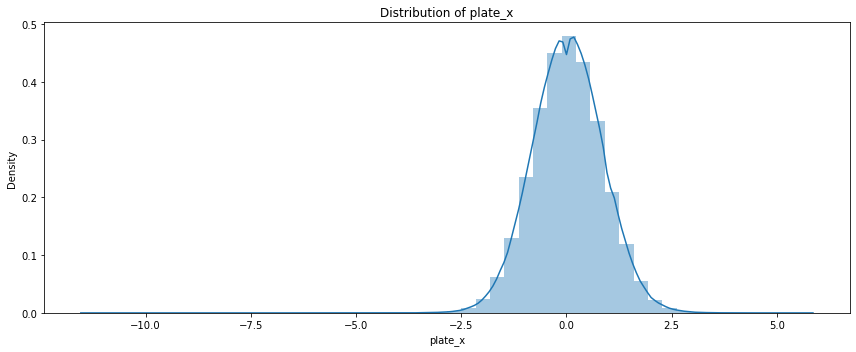

count    717649.000000
mean          2.281944
std           0.968416
min          -4.280000
25%           1.650000
50%           2.290000
75%           2.920000
max          11.020000
Name: plate_z, dtype: float64


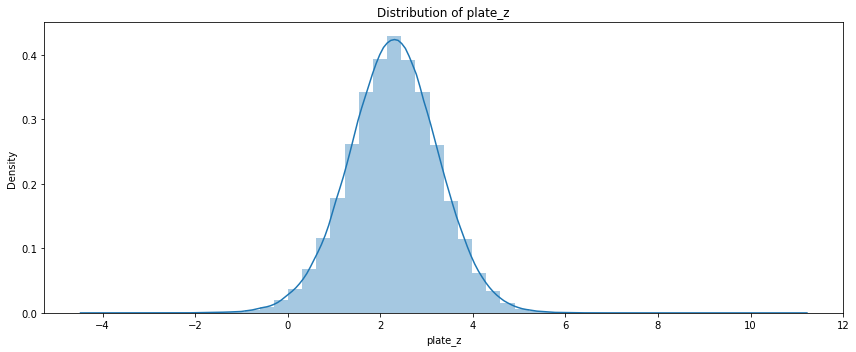

count    715406.000000
mean          3.362464
std           0.192944
min           2.510000
25%           3.230000
50%           3.360000
75%           3.490000
max           4.300000
Name: sz_top, dtype: float64


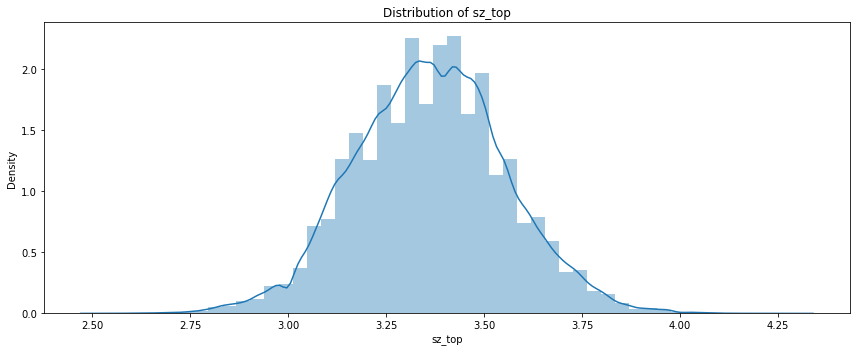

count    717630.000000
mean          1.594283
std           0.112561
min           0.760000
25%           1.520000
50%           1.590000
75%           1.670000
max           2.470000
Name: sz_bot, dtype: float64


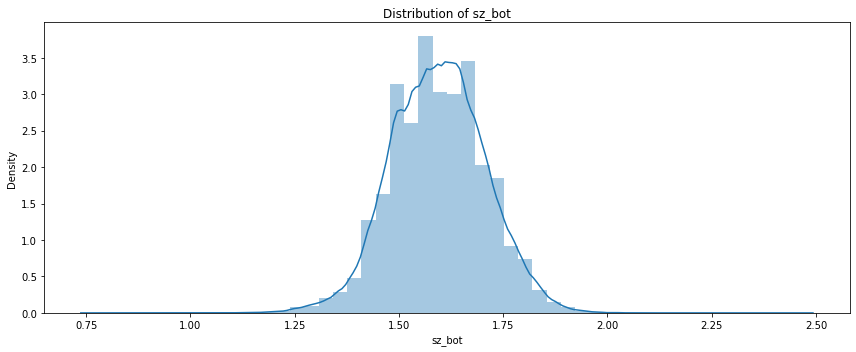

In [23]:
numeric_distribution_plot(validation_data)

## Insights from Plots

plate_x and plaxte_z are Normally distributed

pfx_x,Pfx_z,sZ_top , sz_bot and released speed are not normally distributed

## Checking Uniques Variables in Description

In [24]:
train_data['description'].unique()

array(['ball', 'foul', 'called_strike', 'blocked_ball', 'hit_into_play',
       'hit_by_pitch', 'swinging_strike', 'foul_tip', 'foul_bunt',
       'swinging_strike_blocked', 'missed_bunt', 'pitchout',
       'bunt_foul_tip', 'foul_pitchout'], dtype=object)

In [25]:
train_data['description'].value_counts()

ball                       472125
foul                       253213
hit_into_play              245982
called_strike              232500
swinging_strike            150718
blocked_ball                33376
foul_tip                    13740
swinging_strike_blocked      9187
hit_by_pitch                 4157
foul_bunt                    2680
missed_bunt                   575
pitchout                       73
bunt_foul_tip                  65
foul_pitchout                   1
Name: description, dtype: int64

## Visualizing data to see if it is celan 

<AxesSubplot:>

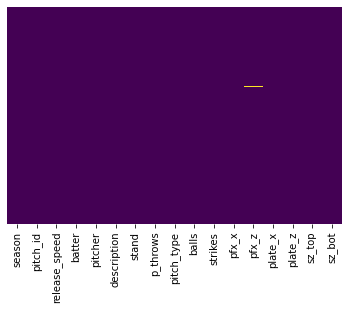

In [26]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

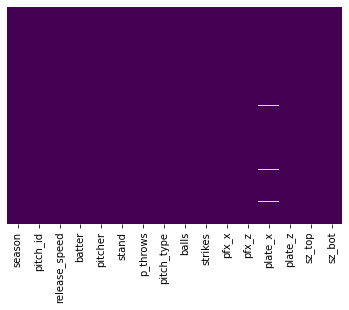

In [27]:
import seaborn as sns
sns.heatmap(validation_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## DATA PREPROCESSING

In [28]:
train_data['description'].unique()

array(['ball', 'foul', 'called_strike', 'blocked_ball', 'hit_into_play',
       'hit_by_pitch', 'swinging_strike', 'foul_tip', 'foul_bunt',
       'swinging_strike_blocked', 'missed_bunt', 'pitchout',
       'bunt_foul_tip', 'foul_pitchout'], dtype=object)

In [29]:
train_data['description'].value_counts()

ball                       472125
foul                       253213
hit_into_play              245982
called_strike              232500
swinging_strike            150718
blocked_ball                33376
foul_tip                    13740
swinging_strike_blocked      9187
hit_by_pitch                 4157
foul_bunt                    2680
missed_bunt                   575
pitchout                       73
bunt_foul_tip                  65
foul_pitchout                   1
Name: description, dtype: int64

# Handling Missing Values

My strategies for filling the missing values for each column based on the relationship with other available data rather than using center of measurement only:

# 1. release_speed
Strategy: Impute missing release_speed using the median (because the data is  not normally distributed, so median is better in such case than mean) release speed grouped by pitch_type. Pitch types generally correlate with certain speed ranges, so this can provide a reasonable estimate

# 2. plate_x and plate_z (horizontal and vertical pitch location)
Strategy: The missing vakues were filled by  imputing using  mean values (because the data is normally distributed) grouped by pitch_type and release_speed, as certain pitch types and speeds tend to have consistent locations.

# 3. sz_top and sz_bot (top and bottom of the strike zone)
Strategy: Since these measurements can vary by batter (due to height and stance), a good approach I could have use is to group by batter height and use the median because the data isnt normally distributed. So here i am assuming pitch types could have a consistent strike zone due to the way they are thrown (like a curveball typically being thrown lower), So i use pitch_type as a proxy for filling in strike zone values alongside the meadian( because the data are not normally distributed)

In [30]:

# Filling 'pitch_type' by the most common pitch type in the datade
most_common_pitch = train_data['pitch_type'].mode()[0]
train_data['pitch_type'] = train_data['pitch_type'].fillna(most_common_pitch)

# Filingl 'release_speed' by 'pitch_type'
train_data['release_speed'] = train_data['release_speed'].fillna(train_data.groupby('pitch_type')['release_speed'].transform('median'))


# Filling 'plate_x' and 'plate_z' by 'pitch_type'
train_data['plate_x'] = train_data['plate_x'].fillna(train_data.groupby('pitch_type')['plate_x'].transform('mean'))
train_data['plate_z'] = train_data['plate_z'].fillna(train_data.groupby('pitch_type')['plate_z'].transform('mean'))

# Filling 'pfx_x' and 'pfx_z' by 'pitch_type'
train_data['pfx_x'] = train_data['pfx_x'].fillna(train_data.groupby('pitch_type')['pfx_x'].transform('median'))
train_data['pfx_z'] = train_data['pfx_z'].fillna(train_data.groupby('pitch_type')['pfx_z'].transform('median'))

# Filling 'sz_top' and 'sz_bot' by 'pitch_type'
train_data['sz_top'] = train_data['sz_top'].fillna(train_data.groupby('pitch_type')['sz_top'].transform('median'))
train_data['sz_bot'] = train_data['sz_bot'].fillna(train_data.groupby('pitch_type')['sz_bot'].transform('median'))



In [31]:

# Filling 'pitch_type' by the most common pitch type in the data
most_common_pitch = validation_data['pitch_type'].mode()[0]
validation_data['pitch_type'] = validation_data['pitch_type'].fillna(most_common_pitch)

# Filling 'release_speed' by 'pitch_type'
validation_data['release_speed'] = validation_data['release_speed'].fillna(validation_data.groupby('pitch_type')['release_speed'].transform('median'))


# Filling 'plate_x' and 'plate_z' by 'pitch_type'
validation_data['plate_x'] = validation_data['plate_x'].fillna(validation_data.groupby('pitch_type')['plate_x'].transform('mean'))
validation_data['plate_z'] = validation_data['plate_z'].fillna(validation_data.groupby('pitch_type')['plate_z'].transform('mean'))

# Filling 'pfx_x' and 'pfx_z' by 'pitch_type'
validation_data['pfx_x'] = validation_data['pfx_x'].fillna(validation_data.groupby('pitch_type')['pfx_x'].transform('median'))
validation_data['pfx_z'] = validation_data['pfx_z'].fillna(validation_data.groupby('pitch_type')['pfx_z'].transform('median'))

# Filling 'sz_top' and 'sz_bot' by 'pitch_type'
validation_data['sz_top'] = validation_data['sz_top'].fillna(validation_data.groupby('pitch_type')['sz_top'].transform('median'))
validation_data['sz_bot'] = validation_data['sz_bot'].fillna(validation_data.groupby('pitch_type')['sz_bot'].transform('median'))


In [32]:
quality_report(train_data)

,Total NaN,Percent of NaN,Nunique,Dtype
pitch_id,1611,0.113579,1416781,float64
season,0,0.000000,2,int64
balls,0,0.000000,5,int64
sz_top,0,0.000000,181,float64
plate_z,0,0.000000,1008,float64
plate_x,0,0.000000,835,float64
pfx_z,0,0.000000,451,float64
pfx_x,0,0.000000,482,float64
strikes,0,0.000000,4,int64
pitch_type,0,0.000000,16,object


In [33]:
save_quality_report_as_image(train_data, 'quality_reportAC_T.png')

In [34]:
quality_report(validation_data)

,Total NaN,Percent of NaN,Nunique,Dtype
pitch_id,1076,0.149872,716869,float64
season,0,0.000000,1,int64
release_speed,0,0.000000,683,float64
batter,0,0.000000,656,int64
pitcher,0,0.000000,863,int64
stand,0,0.000000,2,object
p_throws,0,0.000000,2,object
pitch_type,0,0.000000,17,object
balls,0,0.000000,5,int64
strikes,0,0.000000,3,int64


In [35]:
save_quality_report_as_image(validation_data, 'quality_reportAC_T.png')

## Dropping the unknown pitch event, pitch_id

In [36]:
# Remove rows where any cell has NaN
train_data = train_data.dropna()
validation_data= validation_data.dropna()

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416781 entries, 0 to 1418391
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   season         1416781 non-null  int64  
 1   pitch_id       1416781 non-null  float64
 2   release_speed  1416781 non-null  float64
 3   batter         1416781 non-null  int64  
 4   pitcher        1416781 non-null  int64  
 5   description    1416781 non-null  object 
 6   stand          1416781 non-null  object 
 7   p_throws       1416781 non-null  object 
 8   pitch_type     1416781 non-null  object 
 9   balls          1416781 non-null  int64  
 10  strikes        1416781 non-null  int64  
 11  pfx_x          1416781 non-null  float64
 12  pfx_z          1416781 non-null  float64
 13  plate_x        1416781 non-null  float64
 14  plate_z        1416781 non-null  float64
 15  sz_top         1416781 non-null  float64
 16  sz_bot         1416781 non-null  float64
dtypes: float

In [37]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716869 entries, 0 to 717944
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   season         716869 non-null  int64  
 1   pitch_id       716869 non-null  float64
 2   release_speed  716869 non-null  float64
 3   batter         716869 non-null  int64  
 4   pitcher        716869 non-null  int64  
 5   stand          716869 non-null  object 
 6   p_throws       716869 non-null  object 
 7   pitch_type     716869 non-null  object 
 8   balls          716869 non-null  int64  
 9   strikes        716869 non-null  int64  
 10  pfx_x          716869 non-null  float64
 11  pfx_z          716869 non-null  float64
 12  plate_x        716869 non-null  float64
 13  plate_z        716869 non-null  float64
 14  sz_top         716869 non-null  float64
 15  sz_bot         716869 non-null  float64
dtypes: float64(8), int64(5), object(3)
memory usage: 93.0+ MB


## Confirming if Data is Cleaned

<AxesSubplot:>

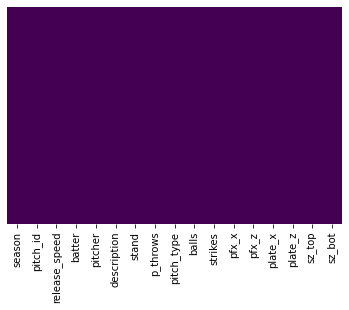

In [38]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

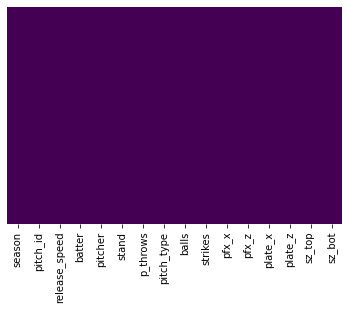

In [39]:
sns.heatmap(validation_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
train_data['description'].unique()

array(['ball', 'foul', 'called_strike', 'blocked_ball', 'hit_into_play',
       'hit_by_pitch', 'swinging_strike', 'foul_tip', 'foul_bunt',
       'swinging_strike_blocked', 'missed_bunt', 'pitchout',
       'bunt_foul_tip', 'foul_pitchout'], dtype=object)

In [41]:
train_data['description'].value_counts()

ball                       471578
foul                       252872
hit_into_play              245711
called_strike              232254
swinging_strike            150571
blocked_ball                33344
foul_tip                    13729
swinging_strike_blocked      9180
hit_by_pitch                 4151
foul_bunt                    2677
missed_bunt                   575
pitchout                       73
bunt_foul_tip                  65
foul_pitchout                   1
Name: description, dtype: int64

###### This is how i classified the description variables into different categories for swing probabilities: (Unlikely Swing, No Swing, Definite Swing, and Attempt to Swing (bunt)), and then to identify them as either "Swing" or "No Swing", So what I did was to create a mapping based on the implications of each type of pitch outcome. My assumptions for the categories are below:

## Classification into Detailed Categories (SwingLikelihood):

# Unlikely Swing:

Ball: Usually no attempt to swing unless the batter is fooled.

Strike (Called Strike): No swing attempt, pitch is within the strike zone.

# No Swing:

Blocked Ball: Typically no swing; more about catcher's actions.

Hit By Pitch: No swing as the batter is hit by the pitch.

Pitchout: Intentional non-swing situation, typically used to manage base runners.

# Definite Swing:

Foul: Clear swing that results in the ball going out of play.

Hit Into Play: Definite swing leading to the ball being played within the field.

Swinging Strike: A miss but an intended swing.

Foul Tip: Direct contact, but the ball goes sharply and directly to the catcher and is held.

Swinging Strike (Blocked): Missed swing that the catcher blocks.

Foul_Pitchout, is somewhat contradictory because pitchouts are not typically swung at, and fouls result from a swing. I feel this description 
might be unusual or possibly an error, but since it was given in the dataset, It could indicate an attempted pitchout that the batter decided to 
swing at, making contact but hitting it foul or it might be a unique situation like a misjudged pitchout that ends up being hittable.

# Attempt to Swing (bunt):

Foul Bunt: Bunt attempt goes foul.

Missed Bunt: Failed bunt attempt.

Bunt Foul Tip: Minor contact on a bunt that is caught by the catcher.

## Classification into General SwingProbability:
Swing: Foul, Hit Into Play, Swinging Strike, Foul Tip, Swinging Strike (Blocked), Foul Bunt, Missed Bunt, Bunt Foul Tip.

No Swing: Ball, Strike (Called Strike), Blocked Ball, Hit By Pitch, Pitchout.

In [42]:
def classify_swing_type(description):
    if description in ['foul', 'hit_into_play', 'swinging_strike', 'foul_tip', 'swinging_strike_blocked', 'foul_pitchout']:
        return 'Definite Swing'
    elif description in ['ball', 'called_strike']:
        return 'Unlikely Swing'
    elif description in ['blocked_ball', 'hit_by_pitch', 'pitchout']:
        return 'No Swing'
    elif description in ['foul_bunt', 'missed_bunt', 'bunt_foul_tip']:
        return 'Attempt to Swing (bunt)'

# Apply the function
train_data['SwingType'] = train_data['description'].apply(classify_swing_type)

In [43]:
# def classify_swing_likelihood(description):
#     if description in ['Foul', 'Hit Into Play', 'Swinging Strike', 'Foul Tip', 'Swinging Strike (Blocked)', 'Foul Bunt', 'Missed Bunt', 'Bunt Foul Tip']:
#         return 'Swing Likely'
#     elif description in ['Ball', 'Strike (Called Strike)', 'Blocked Ball', 'Hit By Pitch', 'Pitchout']:
#         return 'Swing Unlikely'

# # Apply the function to create a new column for Swing Likelihood
# train_data['SwingLikelihood'] = train_data['description'].apply(classify_swing_likelihood)

In [44]:
train_data['SwingType'].unique()

array(['Unlikely Swing', 'Definite Swing', 'No Swing',
       'Attempt to Swing (bunt)'], dtype=object)

In [45]:
train_data['SwingType'].value_counts()

Unlikely Swing             703832
Definite Swing             672064
No Swing                    37568
Attempt to Swing (bunt)      3317
Name: SwingType, dtype: int64

In [46]:
train_data.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType
0,1,2697762.0,93.800003,5782,5738,ball,R,R,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82,Unlikely Swing
1,1,2697773.0,95.599998,5782,5738,foul,R,R,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56,Definite Swing
2,1,2697902.0,94.800003,5782,5842,foul,R,R,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56,Definite Swing
3,1,2697993.0,87.300003,5782,5041,ball,R,R,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73,Unlikely Swing
4,1,2697995.0,98.599998,5782,5041,called_strike,R,R,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70,Unlikely Swing


In [47]:
train_data['description'].isna().sum()

0

In [48]:
train_data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher',
       'description', 'stand', 'p_throws', 'pitch_type', 'balls', 'strikes',
       'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot',
       'SwingType'],
      dtype='object')

In [49]:
validation_data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
       'p_throws', 'pitch_type', 'balls', 'strikes', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'sz_top', 'sz_bot'],
      dtype='object')

In [50]:
# Drop the 'description' column and create a new DataFrame
new_train_data = train_data.drop('description', axis=1)

In [51]:
new_train_data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
       'p_throws', 'pitch_type', 'balls', 'strikes', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'SwingType'],
      dtype='object')

In [52]:
new_train_data['stand'].unique()

array(['R', 'L'], dtype=object)

In [53]:
new_train_data['p_throws'].unique()

array(['R', 'L'], dtype=object)

In [54]:
new_train_data['pitch_type'].unique()

array(['SI', 'FF', 'SL', 'KC', 'CH', 'CU', 'FC', 'ST', 'FS', 'CS', 'SV',
       'FA', 'PO', 'SC', 'EP', 'KN'], dtype=object)

In [55]:
# def remove_outliers(data):
#     for col in data:
#         high = data[col].mean() + 3*data[col].std()
#         low = data[col].mean() - 3*data[col].std()
#         data[col] = np.where(
#             data[col] > high,
#             high,
#             np.where(
#                 data[col] < low,
#                 low,
#                 data[col]))
# remove_outliers(data.drop(['rating_num','winner','team'], axis =1))

## Transforming categorically variable

In [56]:
new_train_data['stand'] = np.where(new_train_data['stand'] == 'R', 1, -1)
new_train_data['p_throws'] = np.where(new_train_data['p_throws'] == 'R', 1, -1)

pitch_type_dummies = pd.get_dummies(new_train_data['pitch_type'], prefix='pitch_type')

# Join the dummy variables back to the original dataset
new_train_data = pd.concat([new_train_data, pitch_type_dummies], axis=1)

# drop the original 'pitch_type' column 
# new_train_data.drop('pitch_type', axis=1, inplace=True)

validation_data['stand'] = np.where(validation_data['stand'] == 'R', 1, -1)
validation_data['p_throws'] = np.where(validation_data['p_throws'] == 'R', 1, -1)

pitch_type_dummies = pd.get_dummies(validation_data['pitch_type'], prefix='pitch_type')

# Join the dummy variables back to the original dataset
validation_data = pd.concat([validation_data, pitch_type_dummies], axis=1)

# drop the original 'pitch_type' column 
# validation_data.drop('pitch_type', axis=1, inplace=True)


In [57]:
# Add a new column called 'pitch_type_FO' with all zero values
new_train_data['pitch_type_FO'] = 0 #I did this because validation data has FO as part of pitch type but missing in new_train_data (year 1 and year 2)data 


In [58]:
new_train_data.head()

,season,pitch_id,release_speed,batter,pitcher,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType,pitch_type_CH,pitch_type_CS,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_ST,pitch_type_SV,pitch_type_FO
0,1,2697762.0,93.800003,5782,5738,1,1,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82,Unlikely Swing,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,2697773.0,95.599998,5782,5738,1,1,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56,Definite Swing,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,2697902.0,94.800003,5782,5842,1,1,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56,Definite Swing,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,2697993.0,87.300003,5782,5041,1,1,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73,Unlikely Swing,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2697995.0,98.599998,5782,5041,1,1,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70,Unlikely Swing,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
validation_data.head()

,season,pitch_id,release_speed,batter,pitcher,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,pitch_type_CH,pitch_type_CS,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FO,pitch_type_FS,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_ST,pitch_type_SV
0,3,4135978.0,78.800003,5464,6936,-1,1,ST,1,1,1.11,0.30,-0.33,0.49,3.58,1.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,4135989.0,93.699997,5464,6936,-1,1,FF,2,2,-1.16,1.36,-1.57,2.49,3.58,1.69,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,4135993.0,94.199997,5464,6936,-1,1,FF,3,2,-1.24,1.26,-1.31,3.48,3.68,1.69,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3,4131576.0,91.199997,6446,6727,1,1,FF,0,0,-1.03,1.38,1.02,2.31,3.29,1.58,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,3,4131602.0,84.500000,5667,6727,1,1,SL,3,2,0.20,0.12,0.61,1.36,3.41,1.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
new_train_data['p_throws'].unique()

array([ 1, -1])

In [61]:
validation_data['p_throws'].unique()

array([ 1, -1])

In [62]:
new_train_data['stand'].unique()

array([ 1, -1])

In [63]:
validation_data['stand'].unique()

array([-1,  1])

# Define a mapping from category to numerical value for the SwingType

In [64]:
# Defining a mapping from category to numerical value for the SwingType
swing_type_mapping = {
    'No Swing': 0,
    'Unlikely Swing': 1,
    'Attempt to Swing (bunt)': 2,
    'Definite Swing': 3
}

# Using the `replace` method to convert categories to numbers
new_train_data['SwingType'] = new_train_data['SwingType'].replace(swing_type_mapping)


In [65]:
new_train_data.head()

,season,pitch_id,release_speed,batter,pitcher,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType,pitch_type_CH,pitch_type_CS,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_ST,pitch_type_SV,pitch_type_FO
0,1,2697762.0,93.800003,5782,5738,1,1,SI,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,2697773.0,95.599998,5782,5738,1,1,FF,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,2697902.0,94.800003,5782,5842,1,1,FF,1,0,-0.62,1.16,0.31,2.40,3.41,1.56,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,2697993.0,87.300003,5782,5041,1,1,SL,2,1,0.82,-0.06,1.11,2.21,3.70,1.73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2697995.0,98.599998,5782,5041,1,1,FF,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [66]:
new_train_data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
       'p_throws', 'pitch_type', 'balls', 'strikes', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'SwingType', 'pitch_type_CH',
       'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA',
       'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC',
       'pitch_type_KN', 'pitch_type_PO', 'pitch_type_SC', 'pitch_type_SI',
       'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV', 'pitch_type_FO'],
      dtype='object')

In [67]:
new_train_data.shape

(1416781, 34)

In [68]:
validation_data.shape

(716869, 33)

In [69]:
validation_data['SwingType'] = 'validation'

In [70]:
validation_data.shape

(716869, 34)

In [71]:
validation_data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
       'p_throws', 'pitch_type', 'balls', 'strikes', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'pitch_type_CH',
       'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA',
       'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FO', 'pitch_type_FS',
       'pitch_type_KC', 'pitch_type_KN', 'pitch_type_PO', 'pitch_type_SC',
       'pitch_type_SI', 'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV',
       'SwingType'],
      dtype='object')

In [72]:
data = pd.concat([new_train_data, validation_data]).reset_index(drop = True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133650 entries, 0 to 2133649
Data columns (total 34 columns):
 #   Column         Dtype  
---  ------         -----  
 0   season         int64  
 1   pitch_id       float64
 2   release_speed  float64
 3   batter         int64  
 4   pitcher        int64  
 5   stand          int32  
 6   p_throws       int32  
 7   pitch_type     object 
 8   balls          int64  
 9   strikes        int64  
 10  pfx_x          float64
 11  pfx_z          float64
 12  plate_x        float64
 13  plate_z        float64
 14  sz_top         float64
 15  sz_bot         float64
 16  SwingType      object 
 17  pitch_type_CH  uint8  
 18  pitch_type_CS  uint8  
 19  pitch_type_CU  uint8  
 20  pitch_type_EP  uint8  
 21  pitch_type_FA  uint8  
 22  pitch_type_FC  uint8  
 23  pitch_type_FF  uint8  
 24  pitch_type_FS  uint8  
 25  pitch_type_KC  uint8  
 26  pitch_type_KN  uint8  
 27  pitch_type_PO  uint8  
 28  pitch_type_SC  uint8  
 29  pitch_type_SI 

In [74]:
data.shape 

(2133650, 34)

## Feature Engineering : FEATURES INTERACTION (ADDITION /MULTIPLICATION/ SUBTRACTION E.T.C)

# I perform feature interaction through polynomial features, which can help in uncovering relationships between different variables that may not be apparent with linear models. This is because I believe interactions between certain variables can identify underlying patterns relevant to player behavior, pitch dynamics, and game strategy. 

# 1. Count-Based Features
balls and strikes: The current ball-strike count can significantly affect a pitcher's behavior and a batter's expectations. A polynomial feature combining these could reflect the pressure or advantage in the count thereby resulting to hitter swing

# 2. Pitch Movement Features
pfx_x and pfx_z: These measure the horizontal and vertical movement of the pitch. Interactions between them could capture the overall break or movement pattern of a pitch.

# 3. Pitch Location Features
plate_x and plate_z: These describe the pitch's location as it crosses home plate. An interaction between these could be useful in identifying patterns in a pitcher's targeting strategy.

# 4. Combined Movement and Location Features
plate_x, plate_z, and sz_top, sz_bot: Integrating pitch location with the top and bottom of the strike zone may show the pitcher's accuracy and tendency to throw in certain areas of the strike zone thereby affecting the swing of the hitter. For instance, a high plate_z value and a high sz_top might indicate a pitcher's strategy to aim high in the zone


In [75]:
poly_feature_1 = ['balls', 'strikes'] # 2 raise to power of 2 features
poly_feature_2 = ['pfx_x', 'pfx_z'] # 2 raise to power of 2 features
poly_feature_3 = ['plate_x', 'plate_z'] # 2 raise to power of 2 features
poly_feature_4 = ['plate_x', 'plate_z', 'plate_x', 'plate_z']# 2 raise to power of 4 features

In [76]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])
poly3 = poly.fit_transform(data[poly_feature_3])
poly4 = poly.fit_transform(data[poly_feature_4])

In [78]:
#Renaming the features to poly1_.....n, poly2_....n
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])
df_poly3 = pd.DataFrame(poly3, columns=[f"poly1_{i}" for i in range(poly3.shape[1])])
df_poly4 = pd.DataFrame(poly4, columns=[f"poly2_{i}" for i in range(poly4.shape[1])])

In [79]:
df_poly1.columns

Index(['poly1_0', 'poly1_1', 'poly1_2'], dtype='object')

In [80]:
df_poly2.columns

Index(['poly2_0', 'poly2_1', 'poly2_2'], dtype='object')

In [81]:
df_poly3.columns

Index(['poly1_0', 'poly1_1', 'poly1_2'], dtype='object')

In [82]:
df_poly4.columns

Index(['poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9'],
      dtype='object')

In [83]:
data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
       'p_throws', 'pitch_type', 'balls', 'strikes', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'SwingType', 'pitch_type_CH',
       'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA',
       'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC',
       'pitch_type_KN', 'pitch_type_PO', 'pitch_type_SC', 'pitch_type_SI',
       'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV', 'pitch_type_FO'],
      dtype='object')

In [84]:
# Correcting the naming of the polynomial features
df_poly3 = pd.DataFrame(poly3, columns=[f"poly3_{i}" for i in range(poly3.shape[1])])
df_poly4 = pd.DataFrame(poly4, columns=[f"poly4_{i}" for i in range(poly4.shape[1])])

# Concatenating the polynomial feature DataFrames to the original data
new_data = pd.concat([data, df_poly1, df_poly2, df_poly3, df_poly4], axis=1)


In [85]:
new_data.shape

(2133650, 53)

In [86]:
data.shape

(2133650, 34)

In [87]:
new_data.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
       'p_throws', 'pitch_type', 'balls', 'strikes', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'SwingType', 'pitch_type_CH',
       'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA',
       'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC',
       'pitch_type_KN', 'pitch_type_PO', 'pitch_type_SC', 'pitch_type_SI',
       'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV', 'pitch_type_FO',
       'poly1_0', 'poly1_1', 'poly1_2', 'poly2_0', 'poly2_1', 'poly2_2',
       'poly3_0', 'poly3_1', 'poly3_2', 'poly4_0', 'poly4_1', 'poly4_2',
       'poly4_3', 'poly4_4', 'poly4_5', 'poly4_6', 'poly4_7', 'poly4_8',
       'poly4_9'],
      dtype='object')

In [88]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133650 entries, 0 to 2133649
Data columns (total 53 columns):
 #   Column         Dtype  
---  ------         -----  
 0   season         int64  
 1   pitch_id       float64
 2   release_speed  float64
 3   batter         int64  
 4   pitcher        int64  
 5   stand          int32  
 6   p_throws       int32  
 7   pitch_type     object 
 8   balls          int64  
 9   strikes        int64  
 10  pfx_x          float64
 11  pfx_z          float64
 12  plate_x        float64
 13  plate_z        float64
 14  sz_top         float64
 15  sz_bot         float64
 16  SwingType      object 
 17  pitch_type_CH  uint8  
 18  pitch_type_CS  uint8  
 19  pitch_type_CU  uint8  
 20  pitch_type_EP  uint8  
 21  pitch_type_FA  uint8  
 22  pitch_type_FC  uint8  
 23  pitch_type_FF  uint8  
 24  pitch_type_FS  uint8  
 25  pitch_type_KC  uint8  
 26  pitch_type_KN  uint8  
 27  pitch_type_PO  uint8  
 28  pitch_type_SC  uint8  
 29  pitch_type_SI 

In [89]:
# Drop the 'season', 'batter', and 'hitter' columns from the DataFrame
new_data = new_data.drop(['season', 'batter', 'pitcher', 'pitch_type'], axis=1)



In [90]:
new_data['pitch_id'] = new_data['pitch_id'].astype(str)




In [91]:
# new_data = new_data.drop('pitch_id', axis=1)

In [92]:
features = new_data.select_dtypes(include = 'number').columns # Selecting all numeric data
features # All the numeric datas

Index(['release_speed', 'stand', 'p_throws', 'balls', 'strikes', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'pitch_type_CH',
       'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA',
       'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC',
       'pitch_type_KN', 'pitch_type_PO', 'pitch_type_SC', 'pitch_type_SI',
       'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV', 'pitch_type_FO',
       'poly1_0', 'poly1_1', 'poly1_2', 'poly2_0', 'poly2_1', 'poly2_2',
       'poly3_0', 'poly3_1', 'poly3_2', 'poly4_0', 'poly4_1', 'poly4_2',
       'poly4_3', 'poly4_4', 'poly4_5', 'poly4_6', 'poly4_7', 'poly4_8',
       'poly4_9'],
      dtype='object')

In [93]:
#splitting data 
train_df = new_data.loc[(new_data['SwingType'] != 'validation')].reset_index(drop = True)
valid_df = new_data.loc[(new_data['SwingType'] == 'validation')].reset_index(drop = True)

In [94]:
train_df['SwingType'] = train_df['SwingType'].apply(int)

In [95]:
target = 'SwingType'

In [96]:
train_df.head()

,pitch_id,release_speed,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType,pitch_type_CH,pitch_type_CS,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_ST,pitch_type_SV,pitch_type_FO,poly1_0,poly1_1,poly1_2,poly2_0,poly2_1,poly2_2,poly3_0,poly3_1,poly3_2,poly4_0,poly4_1,poly4_2,poly4_3,poly4_4,poly4_5,poly4_6,poly4_7,poly4_8,poly4_9
0,2697762.0,93.800003,1,1,1,1,-0.98,0.72,-1.23,4.10,3.70,1.82,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1.0,1.0,-0.98,0.72,-0.7056,-1.23,4.10,-5.0430,-1.23,4.10,-1.23,4.10,-5.0430,1.5129,-5.0430,-5.0430,16.809999,-5.0430
1,2697773.0,95.599998,1,1,3,2,-0.38,0.96,-0.45,3.10,3.41,1.56,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0,2.0,6.0,-0.38,0.96,-0.3648,-0.45,3.10,-1.3950,-0.45,3.10,-0.45,3.10,-1.3950,0.2025,-1.3950,-1.3950,9.609999,-1.3950
2,2697902.0,94.800003,1,1,1,0,-0.62,1.16,0.31,2.40,3.41,1.56,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,-0.62,1.16,-0.7192,0.31,2.40,0.7440,0.31,2.40,0.31,2.40,0.7440,0.0961,0.7440,0.7440,5.760000,0.7440
3,2697993.0,87.300003,1,1,2,1,0.82,-0.06,1.11,2.21,3.70,1.73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.0,1.0,2.0,0.82,-0.06,-0.0492,1.11,2.21,2.4531,1.11,2.21,1.11,2.21,2.4531,1.2321,2.4531,2.4531,4.884100,2.4531
4,2697995.0,98.599998,1,1,3,1,-0.33,0.95,-0.35,3.39,3.70,1.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0,1.0,3.0,-0.33,0.95,-0.3135,-0.35,3.39,-1.1865,-0.35,3.39,-0.35,3.39,-1.1865,0.1225,-1.1865,-1.1865,11.492101,-1.1865


In [97]:
valid_df.head()

,pitch_id,release_speed,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType,pitch_type_CH,pitch_type_CS,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_ST,pitch_type_SV,pitch_type_FO,poly1_0,poly1_1,poly1_2,poly2_0,poly2_1,poly2_2,poly3_0,poly3_1,poly3_2,poly4_0,poly4_1,poly4_2,poly4_3,poly4_4,poly4_5,poly4_6,poly4_7,poly4_8,poly4_9
0,4135978.0,78.800003,-1,1,1,1,1.11,0.30,-0.33,0.49,3.58,1.66,validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1.0,1.0,1.11,0.30,0.3330,-0.33,0.49,-0.1617,-0.33,0.49,-0.33,0.49,-0.1617,0.1089,-0.1617,-0.1617,0.2401,-0.1617
1,4135989.0,93.699997,-1,1,2,2,-1.16,1.36,-1.57,2.49,3.58,1.69,validation,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2.0,2.0,4.0,-1.16,1.36,-1.5776,-1.57,2.49,-3.9093,-1.57,2.49,-1.57,2.49,-3.9093,2.4649,-3.9093,-3.9093,6.2001,-3.9093
2,4135993.0,94.199997,-1,1,3,2,-1.24,1.26,-1.31,3.48,3.68,1.69,validation,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3.0,2.0,6.0,-1.24,1.26,-1.5624,-1.31,3.48,-4.5588,-1.31,3.48,-1.31,3.48,-4.5588,1.7161,-4.5588,-4.5588,12.1104,-4.5588
3,4131576.0,91.199997,1,1,0,0,-1.03,1.38,1.02,2.31,3.29,1.58,validation,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,-1.03,1.38,-1.4214,1.02,2.31,2.3562,1.02,2.31,1.02,2.31,2.3562,1.0404,2.3562,2.3562,5.3361,2.3562
4,4131602.0,84.500000,1,1,3,2,0.20,0.12,0.61,1.36,3.41,1.63,validation,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,2.0,6.0,0.20,0.12,0.0240,0.61,1.36,0.8296,0.61,1.36,0.61,1.36,0.8296,0.3721,0.8296,0.8296,1.8496,0.8296


## MODELLING

In [98]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
X = train_df[features]
y = train_df[target]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## BASELINE MODELLING

In [101]:
model = XGBClassifier(scale_pos_weight = 8,max_depth = 8, n_estimators = 500)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

[22:37:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



In [102]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
weighted_f1 = f1_score(y_test, prediction, average='weighted')

print(f"Accuracy for baseline Model: {accuracy:.2f}")
print(f1_score(y_test, prediction, average='weighted'))
print(f"F1 Score for baseline Model (Weighted): {weighted_f1:.2f}")

Accuracy for baseline Model: 0.84
0.8369801622256199
F1 Score for baseline Model (Weighted): 0.84


In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.25      0.34      7314
           1       0.82      0.88      0.85    141121
           2       0.00      0.00      0.00       684
           3       0.87      0.84      0.86    134238

    accuracy                           0.84    283357
   macro avg       0.55      0.49      0.51    283357
weighted avg       0.84      0.84      0.84    283357



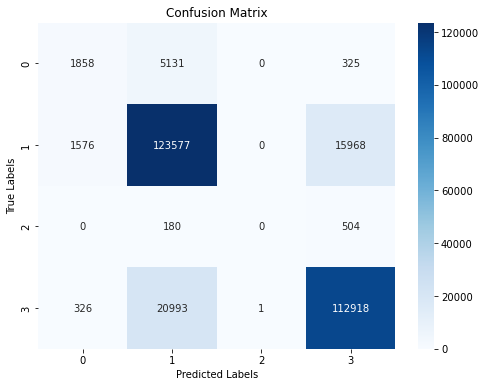

In [104]:
from sklearn.metrics import classification_report, confusion_matrix


# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, prediction))

# Confusion matrix
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# Save the figure
plt.savefig('confusion_matrix for XGBClassifier BM.png', dpi=300, bbox_inches='tight')
plt.show()

In [105]:
y.value_counts()

1    703832
3    672064
0     37568
2      3317
Name: SwingType, dtype: int64

In [106]:
print(f1_score(y_test, prediction, average='weighted'))

# print("Training columns:", X_.columns.tolist())
# print("Test columns:", valid_df.columns.tolist())


0.8369801622256199


In [107]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_, y_ = sm.fit_resample(train_df[features], train_df[target])

F1, fold 1: 0.8886816592003577
Accuracy, fold 1: 0.89
F1, fold 2: 0.941825885860664
Accuracy, fold 2: 0.94
F1, fold 3: 0.9091230354783962
Accuracy, fold 3: 0.91
F1, fold 4: 0.8499238192989388
Accuracy, fold 4: 0.85
F1, fold 5: 0.8288871830680178
Accuracy, fold 5: 0.84
Average F1 Score for LGBMClassifier for Feature Importance: 0.8836883165812749
Average Accuracy for LGBMClassifier for Feature Importance: 0.8865691384297889


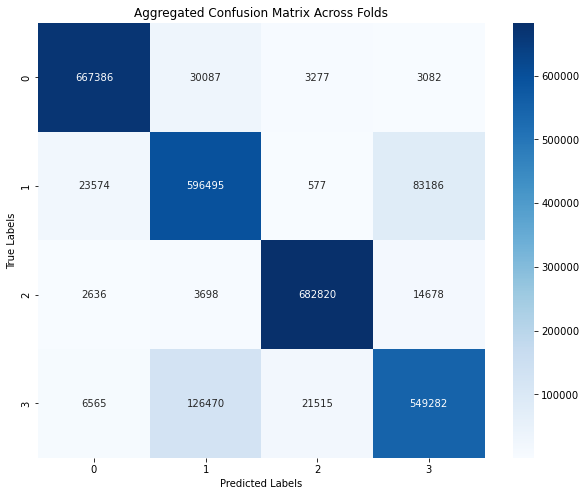

0.8836883165812749


In [108]:
oof_f1=[]
oof_predictions=[]
all_predictions = [] #for plotting the predicted test data 
all_true_labels = [] # for ploting the confusion matrix
all_pred_probs = []  # To store predicted probabilities for plotting
oof_accuracy = [] # # List to store accuracy for each fold

params = {'learning_rate': 0.3,
         'subsample': 0.7845527188607021,
         'colsample_bytree': 0.6474680443294045,
         'max_depth': 5,
         'scale_pos_weight': 1}

fold=StratifiedKFold(n_splits=5)#15#5#10

i=1
for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]

    model = LGBMClassifier(**params, n_estimators=200)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early_ stoppoing 1000
    preds=model.predict(X_test)
    pred_accuracy = accuracy_score(y_test, preds)

    print(f"F1, fold {i}: {f1_score(y_test, preds, average='weighted')}")
    print(f"Accuracy, fold {i}: {pred_accuracy:.2f}")
    i+=1                
    oof_f1.append(f1_score(y_test,preds,average='weighted'))
    oof_accuracy.append(pred_accuracy)
    p2 = model.predict_proba(valid_df[features])
    oof_predictions.append(p2)
    pred_probs = model.predict_proba(X_test)
    # Collecting predictions and true labels
    all_predictions.extend(preds)
    all_true_labels.extend(y_test)
    all_pred_probs.extend(pred_probs)

# Print the average F1 score
print(f"Average F1 Score for LGBMClassifier for Feature Importance: {np.mean(oof_f1)}")
print(f"Average Accuracy for LGBMClassifier for Feature Importance: {np.mean(oof_accuracy)}")  # Average accuracy across all folds


# Generating confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Aggregated Confusion Matrix Across Folds')
plt.savefig('confusion_matrixLGBMCLassifier for Feature Importance.png')  # Save the confusion matrix as an image
plt.show()
plt.close()    

print(np.mean(oof_f1))

# Visualizing Predicted Probabilities

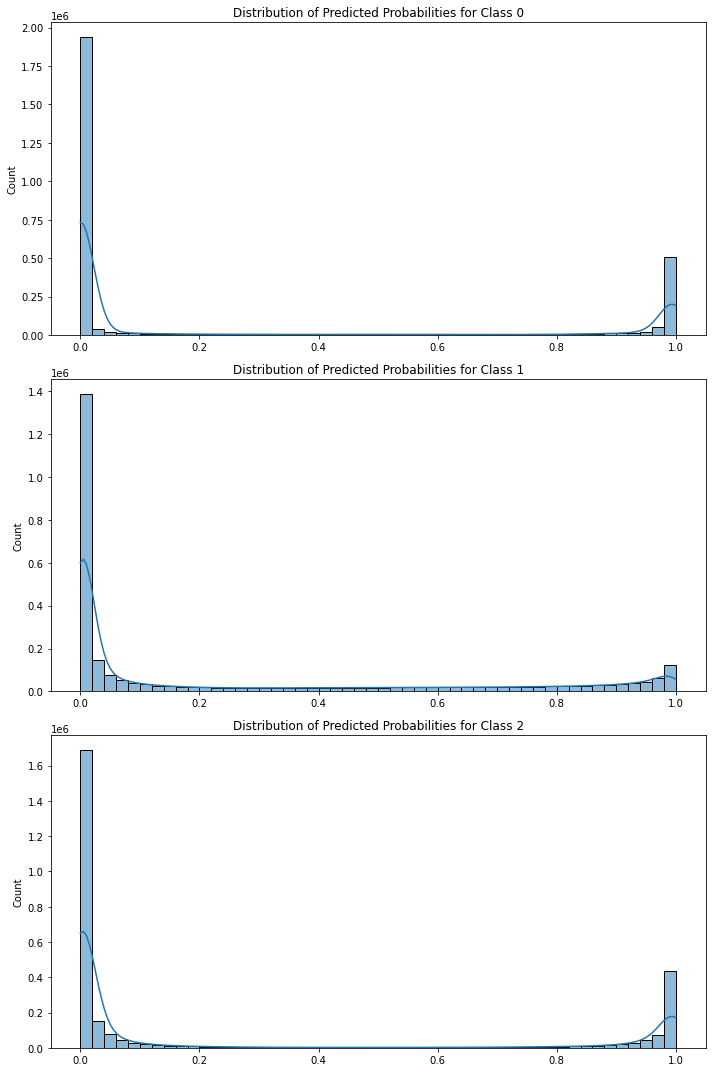

In [109]:
# Convert list of numpy arrays to a single numpy array
all_pred_probs = np.vstack(all_pred_probs)

# Assuming you have a multi-class problem with, e.g., 3 classes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for i in range(3):
    sns.histplot(all_pred_probs[:, i], bins=50, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of Predicted Probabilities for Class {i}')
plt.tight_layout()
plt.savefig('predicted_probabilities_distribution for for Feature Importance.png')
plt.show()
plt.close()

In [110]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
# Save the plot
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.title('Model features importance:')

Text(0.5, 1.0, 'Model features importance:')

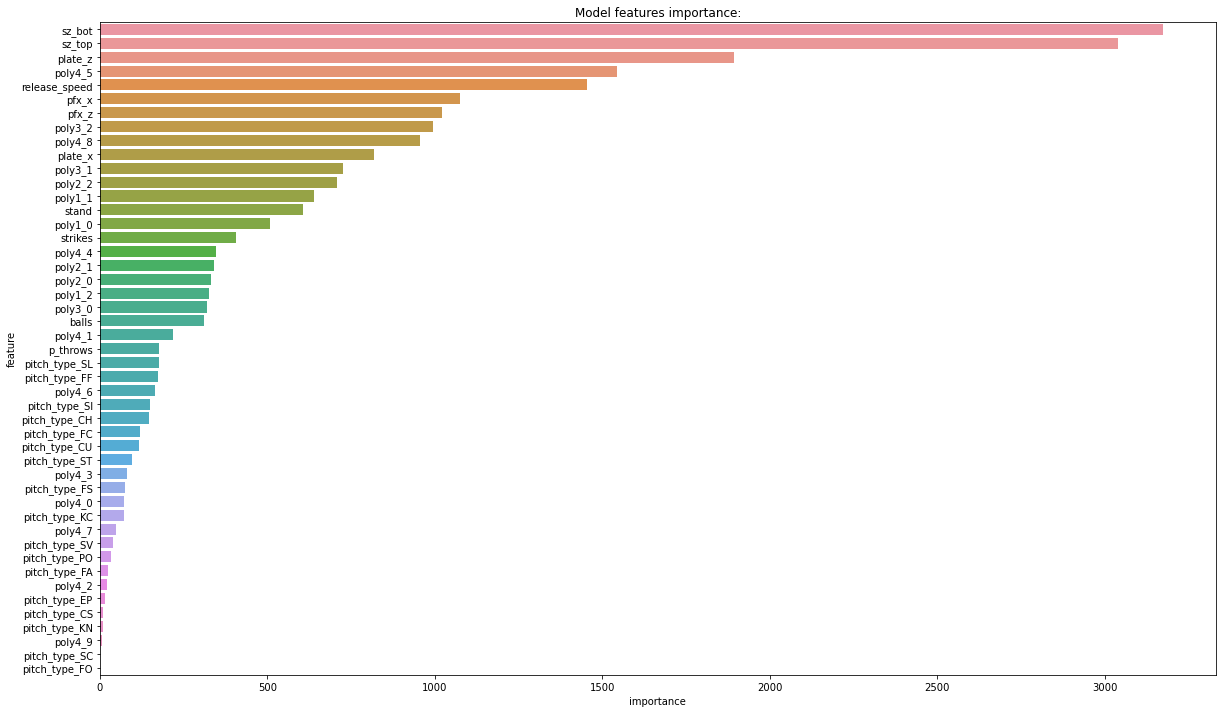

## Feature Selection

In [111]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(23)['feature'].to_list()
new_feat

['sz_bot',
 'sz_top',
 'plate_z',
 'poly4_5',
 'release_speed',
 'pfx_x',
 'pfx_z',
 'poly3_2',
 'poly4_8',
 'plate_x',
 'poly3_1',
 'poly2_2',
 'poly1_1',
 'stand',
 'poly1_0',
 'strikes',
 'poly4_4',
 'poly2_1',
 'poly2_0',
 'poly1_2',
 'poly3_0',
 'balls',
 'poly4_1']

# Hyperparameter Tuning

In [112]:
import optuna

In [113]:
X = train_df[new_feat]
y = train_df[target]

In [114]:
def objective(trial):
    oof_f1=[]
    param = {
        'learning_rate': trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001),
        'depth': trial.suggest_int('depth', 3, 15),
        'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5),
        'min_child_samples': trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32]),
        'iterations': trial.suggest_discrete_uniform("iterations", 200, 2000, 50),
        'colsample_bylevel': trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        'random_state': 0,
        'bootstrap_type': trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        'logging_level': 'Silent',
        # Assuming class_weights are calculated or predefined:
        # 'class_weights': [weight1, weight2, weight3, weight4]
    }

    fold=StratifiedKFold(n_splits=5) #15#5#10
    for train_index, test_index in fold.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = CatBoostClassifier(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=200, verbose=False) #early 1000
        preds = model.predict(X_test)
        oof_f1.append(f1_score(y_test, preds, average='weighted'))

    return np.mean(oof_f1)

In [116]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=5) #10000

[I 2024-04-27 01:30:33,736] A new study created in memory with name: no-name-c5ee888e-7027-46a9-a6ab-05ed2f684213
[I 2024-04-27 02:02:23,102] Trial 0 finished with value: 0.7786625775776315 and parameters: {'learning_rate': 0.065, 'depth': 6, 'l2_leaf_reg': 4.0, 'min_child_samples': 1, 'iterations': 1750.0, 'colsample_bylevel': 0.04617090859265818, 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.7786625775776315.
[I 2024-04-27 02:20:18,404] Trial 1 finished with value: 0.7315272665541249 and parameters: {'learning_rate': 0.056, 'depth': 7, 'l2_leaf_reg': 5.5, 'min_child_samples': 16, 'iterations': 1250.0, 'colsample_bylevel': 0.018053686666848874, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.7786625775776315.
[I 2024-04-27 02:36:50,464] Trial 2 finished with value: 0.7815712296653001 and parameters: {'learning_rate': 0.096, 'depth': 4, 'l2_leaf_reg': 4.0, 'min_child_samples': 1, 'iterations': 850.0, 'colsample_bylevel': 0.07295942084474646, 'bootstrap_type': 'B

In [117]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 5
Best trial:
  Value: 0.7815712296653001
  Params: 
    learning_rate: 0.096
    depth: 4
    l2_leaf_reg: 4.0
    min_child_samples: 1
    iterations: 850.0
    colsample_bylevel: 0.07295942084474646
    bootstrap_type: Bayesian


In [ ]:
print(np.unique(y_))

In [ ]:

# oof_f1=[]
# cat_oof_predictions_p4=[]
# all_true_labels = []
# prob_oof_predictions =[]

# param = trial.params 
# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))



# fold=StratifiedKFold(n_splits=5)#15#5#10
# i=1

# for train_index, test_index in fold.split(X_,y_):
        
#     X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
#     y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
#     model = CatBoostClassifier(**param ,loss_function='MultiClass') #10000
#     model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early stopping 1000
#      # Make predictions and evaluate
#     preds = model.predict(X_test)
#     unique_preds = np.unique(preds)
#     if not np.all(np.isin(unique_preds, [0, 1, 2, 3])):
#         raise ValueError("Unexpected class predictions found:", unique_preds)
#     print("err: ",f1_score(y_test,preds,average='weighted'))
#     f1 = f1_score(y_test, preds, average='weighted')
#     acc = accuracy_score(y_test, preds)
#     # print(f"F1 Score, fold {fold}: {f1}")
#     print(f"F1, fold {i}: {f1_score(y_test, preds, average='weighted')}")
#     print(f"Accuracy, fold {i}: {pred_accuracy:.2f}")
     
#     oof_f1.append(f1)
    
#     # Store the probabilities and true labels
#     probs = model.predict_proba(X_test)
#     prob_oof_predictions.append(probs)
#     all_true_labels.extend(y_test)
#     # Store out-of-fold predictions
#     p4 = model.predict_proba(valid_df[X_.columns])
#     cat_oof_predictions_p4.append(p4)
#     all_true_labels.extend(y_test)  # Append true labels for later use

#     i+=1 
#     # Confusion matrix for the current fold
#     cm = confusion_matrix(y_test, preds, labels=[0, 1, 2, 3])
#     confusion_matrices.append(cm)
# # Print the mean F1 score across all folds
# mean_f1 = np.mean(oof_f1)
# print(f"Mean F1 Score: {mean_f1}")
# # Plot aggregated confusion matrix
# final_cm = np.sum(confusion_matrices, axis=0)
# plt.figure(figsize=(10, 8))
# sns.heatmap(final_cm, annot=True, fmt='d', cmap='viridis', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.title('Aggregated Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.savefig('confusion_matrix for CatBoostClassifier with top features.png')
# plt.show()

In [198]:
 

# oof_f1=[]
# cat_oof_predictions_p4=[]
# all_predictions = [] #for plotting the predicted test data 
# all_true_labels = []
# oof_accuracy = [] # # List to store accuracy for each fold
# prob_oof_predictions =[]

# param = trial.params 
# print("Number of finished trials: {}".format(len(study.trials)))

# print("Best trial:")
# trial = study.best_trial

# print("  Value: {}".format(trial.value))

# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))



# fold=StratifiedKFold(n_splits=5)#15#5#10
# i=1

# for train_index, test_index in fold.split(X_,y_):
        
#     X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
#     y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
#     model = CatBoostClassifier(**param ,loss_function='MultiClass') #10000
#     model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early stopping 1000
#      # Make predictions and evaluate
#     preds = model.predict(X_test)
#     unique_preds = np.unique(preds)
#     if not np.all(np.isin(unique_preds, [0, 1, 2, 3])):
#         raise ValueError("Unexpected class predictions found:", unique_preds)
#     print("err: ",f1_score(y_test,preds,average='weighted'))
#     f1 = f1_score(y_test, preds, average='weighted')
#     acc = accuracy_score(y_test, preds)
#     # print(f"F1 Score, fold {fold}: {f1}")
#     print(f"F1, fold {i}: {f1_score(y_test, preds, average='weighted')}")
#     print(f"Accuracy, fold {i}: {pred_accuracy:.2f}")
     
#     oof_f1.append(f1)
#     oof_accuracy.append(acc)
    
#     # Store the probabilities and true labels
#     probs = model.predict_proba(X_test)
#     prob_oof_predictions.append(probs)
#     # all_true_labels.extend(y_test)
#     # Store out-of-fold predictions
#     p4 = model.predict_proba(valid_df[X_.columns])
#     cat_oof_predictions_p4.append(p4)
#     all_predictions.extend(preds)  # Collect predictions
#     all_true_labels.extend(y_test)  # Append true labels for later use

    
# # Print the mean F1 score across all folds
# mean_f1 = np.mean(oof_f1)
# print(f" Average Mean F1 Score for CatBoostClassifier with top features: {mean_f1}")
# print(f"Average Accuracy for CatBoostClassifier with top features: {np.mean(oof_accuracy)}")  # Average accuracy across all folds

In [199]:
# # from catboost import CatBoostClassifier
# # from sklearn.model_selection import StratifiedKFold
# # from sklearn.metrics import f1_score, accuracy_score

# # Best trial parameters
# params = {
#     'learning_rate': 0.096,
#     'depth': 4,
#     'l2_leaf_reg': 4.0,
#     'min_child_samples': 1,
#     'iterations': 850,
#     'colsample_bylevel': 0.07295942084474646,
#     'bootstrap_type': 'Bayesian'
# }

# oof_f1 = []
# cat_oof_predictions_p4 = []
# all_predictions = []  # for plotting the predicted test data 
# all_true_labels = []
# oof_accuracy = []  # List to store accuracy for each fold
# prob_oof_predictions = []

# # Initialize the CatBoostClassifier with the best trial parameters
# model = CatBoostClassifier(**params, loss_function='MultiClass')

# fold = StratifiedKFold(n_splits=5)  # 15#5#10
# i = 1

# for train_index, test_index in fold.split(X_, y_):
#     X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
#     y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
#     # Train the model
#     model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=200, verbose=False)
    
#     # Make predictions and evaluate
#     preds = model.predict(X_test)
#     f1 = f1_score(y_test, preds, average='weighted')
#     acc = accuracy_score(y_test, preds)

#     print(f"F1, fold {i}: {f1}")
#     print(f"Accuracy, fold {i}: {acc}")

#     oof_f1.append(f1)
#     oof_accuracy.append(acc)
    
#     # Store the probabilities and true labels
#     probs = model.predict_proba(X_test)
#     prob_oof_predictions.append(probs)
#     p4 = model.predict_proba(valid_df[X_.columns])
#     cat_oof_predictions_p4.append(p4)
#     all_predictions.extend(preds)  # Collect predictions
#     all_true_labels.extend(y_test)  # Append true labels for later use

#     i += 1

# # Print the mean F1 score and accuracy across all folds
# mean_f1 = np.mean(oof_f1)
# mean_accuracy = np.mean(oof_accuracy)
# print(f"Average Mean F1 Score for CatBoostClassifier with top features: {mean_f1}")
# print(f"Average Accuracy for CatBoostClassifier with top features: {mean_accuracy}")

F1, fold 1: 0.8396658870389605
Accuracy, fold 1: 0.8418267130318648
F1, fold 2: 0.8477152274432967
Accuracy, fold 2: 0.8504562520201895
F1, fold 3: 0.8359905082326289
Accuracy, fold 3: 0.8382907154756281
F1, fold 4: 0.7987164185980339
Accuracy, fold 4: 0.8022714961860531
F1, fold 5: 0.8038400347286819
Accuracy, fold 5: 0.807769973271292
Average Mean F1 Score for CatBoostClassifier with top features: 0.8251856152083203
Average Accuracy for CatBoostClassifier with top features: 0.8281230299970055


In [118]:
oof_f1=[]
cat_oof_predictions_p4=[]
oof_accuracy = []
all_predictions = []  # for plotting the predicted test data 
all_true_labels = []
oof_accuracy = []  # List to store accuracy for each fold
prob_oof_predictions = []

param = trial.params 
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
    model = CatBoostClassifier(**param ,loss_function='MultiClass') #10000
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early stopping 1000
     # Make predictions and evaluate
    preds = model.predict(X_test)
    unique_preds = np.unique(preds)
    if not np.all(np.isin(unique_preds, [0, 1, 2, 3])):
        raise ValueError("Unexpected class predictions found:", unique_preds)
    print("err: ",f1_score(y_test,preds,average='weighted'))
    f1 = f1_score(y_test, preds, average='weighted')
    acc = accuracy_score(y_test, preds)
    # print(f"F1 Score, fold {fold}: {f1}")
    oof_f1.append(f1)
    oof_accuracy.append(acc)
    probs = model.predict_proba(X_test)
    prob_oof_predictions.append(probs)
    
    # Store out-of-fold predictions
    p4 = model.predict_proba(valid_df[X_.columns])
    cat_oof_predictions_p4.append(p4)
    all_predictions.extend(preds)  # Collect predictions
    all_true_labels.extend(y_test)  # Append true labels for later use
    i += 1
# Print the mean F1 score across all folds
mean_f1 = np.mean(oof_f1)
mean_accuracy = np.mean(oof_accuracy)
print(f"Mean F1 Score: {mean_f1}")
print(f" Average Mean F1 Score for CatBoostClassifier with top features: {mean_f1}")
print(f"Average Accuracy for CatBoostClassifier with top features: {np.mean(oof_accuracy)}")

Number of finished trials: 5
Best trial:
  Value: 0.7815712296653001
  Params: 
    learning_rate: 0.096
    depth: 4
    l2_leaf_reg: 4.0
    min_child_samples: 1
    iterations: 850.0
    colsample_bylevel: 0.07295942084474646
    bootstrap_type: Bayesian
err:  0.8396658870389605
err:  0.8477152274432967
err:  0.8359905082326289
err:  0.7987164185980339
err:  0.8038400347286819
Mean F1 Score: 0.8251856152083203
 Average Mean F1 Score for CatBoostClassifier with top features: 0.8251856152083203
Average Accuracy for CatBoostClassifier with top features: 0.8281230299970055


Overall Accuracy: 0.83
Overall F1 Score: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93    703832
           1       0.77      0.71      0.74    703832
           2       0.87      0.89      0.88    703832
           3       0.77      0.74      0.76    703832

    accuracy                           0.83   2815328
   macro avg       0.82      0.83      0.83   2815328
weighted avg       0.82      0.83      0.83   2815328



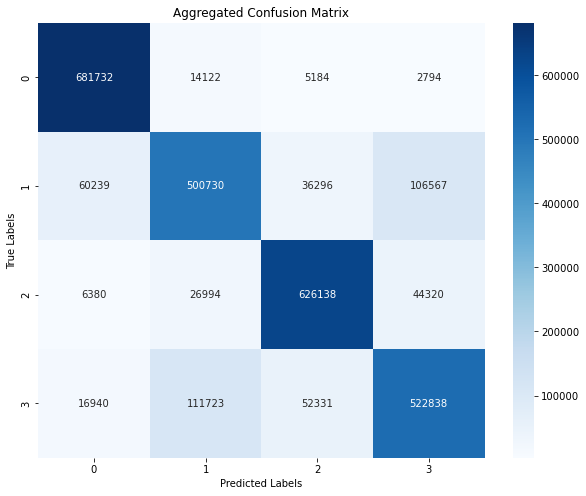

In [200]:

# Compute the confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions, labels=model.classes_)

# Compute overall accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print(f"Overall Accuracy: {accuracy:.2f}")

# Compute overall F1 score
overall_f1 = f1_score(all_true_labels, all_predictions, average='weighted')
print(f"Overall F1 Score: {overall_f1:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(all_true_labels, all_predictions))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Aggregated Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('aggregated_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [119]:
feature_importances = model.feature_importances_

In [120]:
feature_importances

array([9.32951977e-01, 4.56750193e+00, 7.72194483e-01, 2.75137188e+00,
       5.07578691e+00, 3.53475001e-01, 6.80790019e-01, 1.36444306e+00,
       4.91747490e+00, 8.26064278e+00, 7.80944970e+00, 1.42215312e+00,
       3.24382967e-03, 8.31057162e-01, 1.34289903e-02, 3.43005598e-02,
       7.16862252e-01, 1.76346726e+00, 3.13358757e-01, 5.60366510e-01,
       7.97538458e-04, 1.20482849e-02, 0.00000000e+00, 1.10518368e+00,
       1.31803823e+00, 2.83648275e-01, 8.25057816e-02, 0.00000000e+00,
       4.59107235e+00, 6.71087072e+00, 2.92870504e+00, 6.52513942e-01,
       5.33468565e-01, 4.04643777e-01, 1.54965589e+00, 4.77095740e+00,
       1.43586063e+00, 8.36180609e-01, 6.59689747e+00, 1.69459484e+00,
       4.96859190e+00, 9.33717115e-01, 4.17910541e+00, 1.25258361e+00,
       1.07067355e+00, 7.96343082e+00, 9.79933502e-01])

Text(0.5, 1.0, 'Model features importance:')

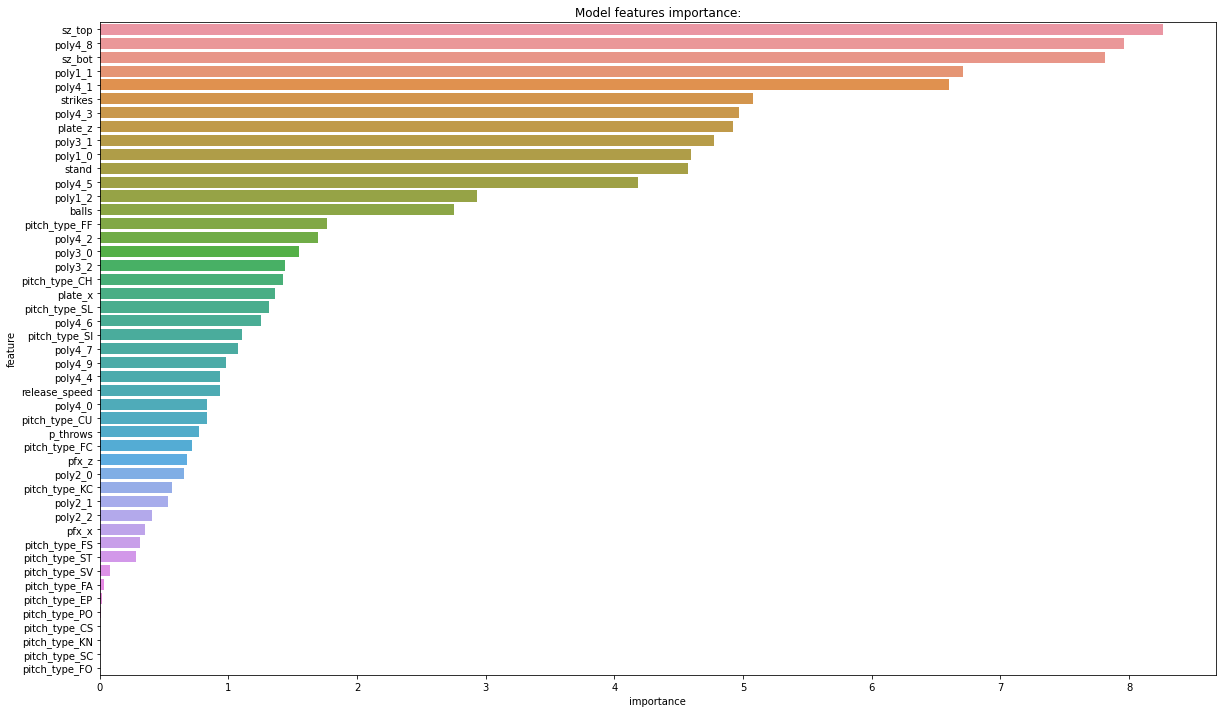

In [123]:
feature_importance = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by = ['importance'], ascending = False).head(60))
# Save the plot
plt.savefig('feature_importance_CatBoost.png', dpi=300, bbox_inches='tight')
plt.title('Model features importance:')

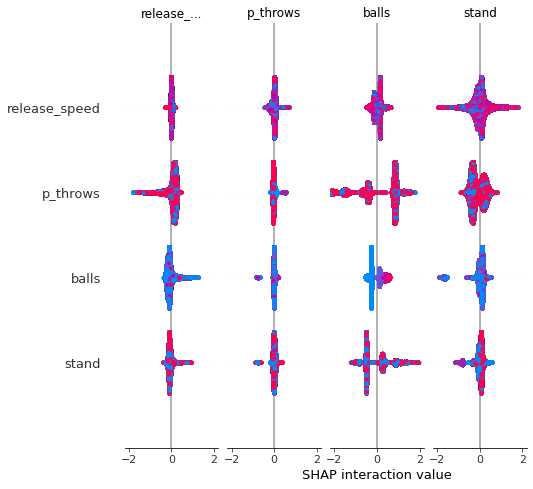

In [128]:
import shap

# For LGBMClassifie
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
# Plot feature importance
shap.summary_plot(shap_values, X_train)

In [137]:
plt.savefig('summary_plotCatBoost.png')  # Save the plot as a PNG file

<Figure size 432x288 with 0 Axes>

In [127]:
# pip install shap

In [ ]:
# # Aggregate probabilities across all folds
# all_pred_probs = np.vstack(probs_oof_predictions)  # Vertical stack to create a single array
# predicted_classes = np.argmax(all_pred_probs, axis=1)  # Get the class with the highest probability

# # Compute the confusion matrix
# cm = confusion_matrix(all_true_labels, predicted_classes, labels=[0, 1, 2, 3])

# # Plotting the confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.title('Confusion Matrix from Predicted Probabilities')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.savefig('confusion_matrix_from_predicted_probs CatBoostClassifier with top features.png')  # Save the confusion matrix as an image
# plt.show()

In [129]:
print(p4.shape)  # Should show (number_of_instances, number_of_classes)
print(p4[0])

(716869, 4)
[0.82462982 0.11652335 0.00373635 0.05511048]


In [130]:
cat_oof_predictions_p4

[array([[7.88689527e-01, 1.46684760e-01, 3.26733441e-03, 6.13583785e-02],
        [1.28871193e-03, 7.47628452e-01, 1.15515781e-02, 2.39531258e-01],
        [1.59209835e-03, 7.39643858e-01, 4.23568871e-03, 2.54528355e-01],
        ...,
        [9.34315514e-01, 4.34672367e-02, 1.84541222e-03, 2.03718368e-02],
        [2.05225168e-04, 9.76196016e-02, 4.45580365e-02, 8.57617137e-01],
        [7.35166075e-03, 8.11442259e-01, 1.32342765e-02, 1.67971803e-01]]),
 array([[8.37335870e-01, 1.13895396e-01, 3.09785129e-03, 4.56708827e-02],
        [1.84435188e-03, 8.13285975e-01, 4.13084459e-03, 1.80738829e-01],
        [1.82644242e-03, 7.76273537e-01, 2.44360496e-03, 2.19456415e-01],
        ...,
        [9.34039033e-01, 4.34702884e-02, 1.76886038e-03, 2.07218182e-02],
        [3.46690125e-04, 1.11298220e-01, 4.15432259e-02, 8.46811864e-01],
        [1.49507940e-02, 7.80283721e-01, 2.31647591e-02, 1.81600726e-01]]),
 array([[8.30958969e-01, 1.10561182e-01, 3.02049240e-03, 5.54593566e-02],
        

In [131]:
##  features without polynomial:
    

new_feat2= ['release_speed', 'stand', 'p_throws', 'balls', 'strikes', 'pfx_x', 
            'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'SwingType', 
            'pitch_type_CH', 'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 
            'pitch_type_FA', 'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 
            'pitch_type_KC', 'pitch_type_KN', 'pitch_type_PO', 'pitch_type_SC', 
            'pitch_type_SI', 'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV', 
            'pitch_type_FO']
X = train_df[new_feat2]

In [132]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
#     param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
#     param['depth'] = trial.suggest_int('depth', 3, 15)
#     param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
#     param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
#     param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
#     param['use_best_model'] = True
#     param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
#     param['random_state'] = 0
    
#     param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
#     param['logging_level'] = 'Silent'
    
#     param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
# #     param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
# #     param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
#     param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
#     param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
#     param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
#     # param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 3, 10)
    
    param = {
        'objective': 'multiclass',  # Setting the objective to multiclass
        'learning_rate': trial.suggest_float("learning_rate", 1e-2, 0.25, log=True),
        'subsample': trial.suggest_float("subsample", 0.1, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.1, 1.0),
        'max_depth': trial.suggest_int("max_depth", 5, 20),
        'num_class': len(np.unique(y)),  # Ensure y is your target variable array
        'random_state': 0  # Ensuring reproducibility
    }



    fold=StratifiedKFold(n_splits=2)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LGBMClassifier(**param ,n_estimators=200) #10000

    
        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#erly100
        preds=model.predict(X_test)
        oof_f1.append(f1_score(y_test,preds,average='weighted'))

    

    return np.mean(oof_f1)

In [133]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=2) #10000

[I 2024-04-27 06:04:28,997] A new study created in memory with name: no-name-47a596cd-d699-4c76-8dbf-2eb649f4e91a
[I 2024-04-27 06:07:19,505] Trial 0 finished with value: 0.9999666082968124 and parameters: {'learning_rate': 0.02445378194153109, 'subsample': 0.646833442179674, 'colsample_bytree': 0.41959896085957604, 'max_depth': 13}. Best is trial 0 with value: 0.9999666082968124.
[I 2024-04-27 06:10:11,118] Trial 1 finished with value: 0.9999971749995817 and parameters: {'learning_rate': 0.024911210618856306, 'subsample': 0.9566303384740106, 'colsample_bytree': 0.5345394417979029, 'max_depth': 18}. Best is trial 1 with value: 0.9999971749995817.


In [134]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 2
Best trial:
  Value: 0.9999971749995817
  Params: 
    learning_rate: 0.024911210618856306
    subsample: 0.9566303384740106
    colsample_bytree: 0.5345394417979029
    max_depth: 18


In [135]:
trial.params

{'learning_rate': 0.024911210618856306,
 'subsample': 0.9566303384740106,
 'colsample_bytree': 0.5345394417979029,
 'max_depth': 18}

Number of finished trials: 2
Best trial:
  Value: 0.9999971749995817
  Params: 
    learning_rate: 0.024911210618856306
    subsample: 0.9566303384740106
    colsample_bytree: 0.5345394417979029
    max_depth: 18
err:  0.8768551985587413
Accuracy, fold 1: 0.84
err:  0.8881423398917192
Accuracy, fold 2: 0.84
err:  0.8615520770221715
Accuracy, fold 3: 0.84
err:  0.8020886568535495
Accuracy, fold 4: 0.84
err:  0.8027659741025229
Accuracy, fold 5: 0.84
0.8462808492857409
Average F1 Score for LGBMClassifier for features without feature interactions: 0.8462808492857409
Average Accuracy for LGBMClassifier for features without feature interactions: 0.8388853862342713


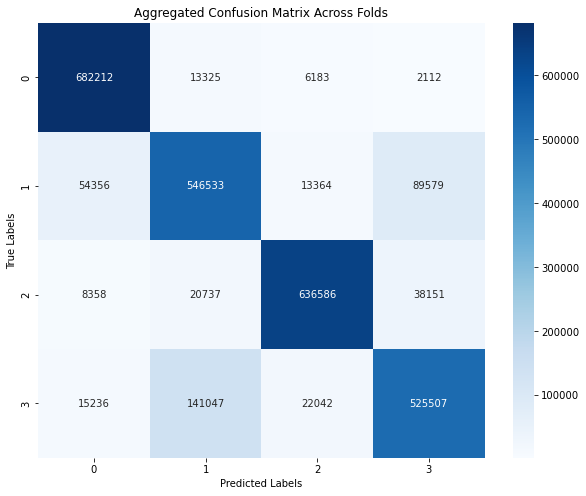

In [138]:
oof_f1=[]
lgb_oof_predictions_p3=[]
all_predictions = [] #for plotting the predicted test data 
all_true_labels = [] # for ploting the confusion matrix
all_pred_probs = []  # To store predicted probabilities for plotting
oof_accuracy = [] # # List to store accuracy for each fold


param = trial.params 
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
    model = LGBMClassifier(**param ,n_estimators=200, objective='multiclass', num_class=4, random_state=42) #10000

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early stopping 1000
    preds=model.predict(X_test)
    print("err: ",f1_score(y_test,preds,average='weighted'))
    print(f"Accuracy, fold {i}: {pred_accuracy:.2f}")
    i+=1  
    oof_f1.append(f1_score(y_test,preds,average='weighted'))
    oof_accuracy.append(pred_accuracy)
    p3 = model.predict_proba(valid_df[X_.columns])
    lgb_oof_predictions_p3.append(p3)
    pred_probs = model.predict_proba(X_test)
    # Collecting predictions and true labels
    all_predictions.extend(preds)
    all_true_labels.extend(y_test)
    all_pred_probs.extend(pred_probs)
print(np.mean(oof_f1))
# Print the average F1 score
print(f"Average F1 Score for LGBMClassifier for features without feature interactions: {np.mean(oof_f1)}")
print(f"Average Accuracy for LGBMClassifier for features without feature interactions: {np.mean(oof_accuracy)}")  # Average accuracy across all folds


# Generating confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)
# Display classification report
print("\nClassification Report:")
print(classification_report(all_true_labels, all_predictions))

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Aggregated Confusion Matrix Across Folds')
plt.savefig('confusion_matrixLGBMCLassifier for features without feature interactions.png')  # Save the confusion matrix as an image
plt.show()
    


In [202]:
# Generating and plotting confusion matrix
cm = confusion_matrix(all_true_labels, all_predictions)
print("\nClassification Report:")
print(classification_report(all_true_labels, all_predictions))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Aggregated Confusion Matrix Across Folds')
plt.savefig('confusion_matrixLGBMClassifier.png')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    703832
           1       0.76      0.78      0.77    703832
           2       0.94      0.90      0.92    703832
           3       0.80      0.75      0.77    703832

    accuracy                           0.85   2815328
   macro avg       0.85      0.85      0.85   2815328
weighted avg       0.85      0.85      0.85   2815328



In [139]:
feature_importances_LG= model.feature_importances_

Text(0.5, 1.0, 'Model features importance:')

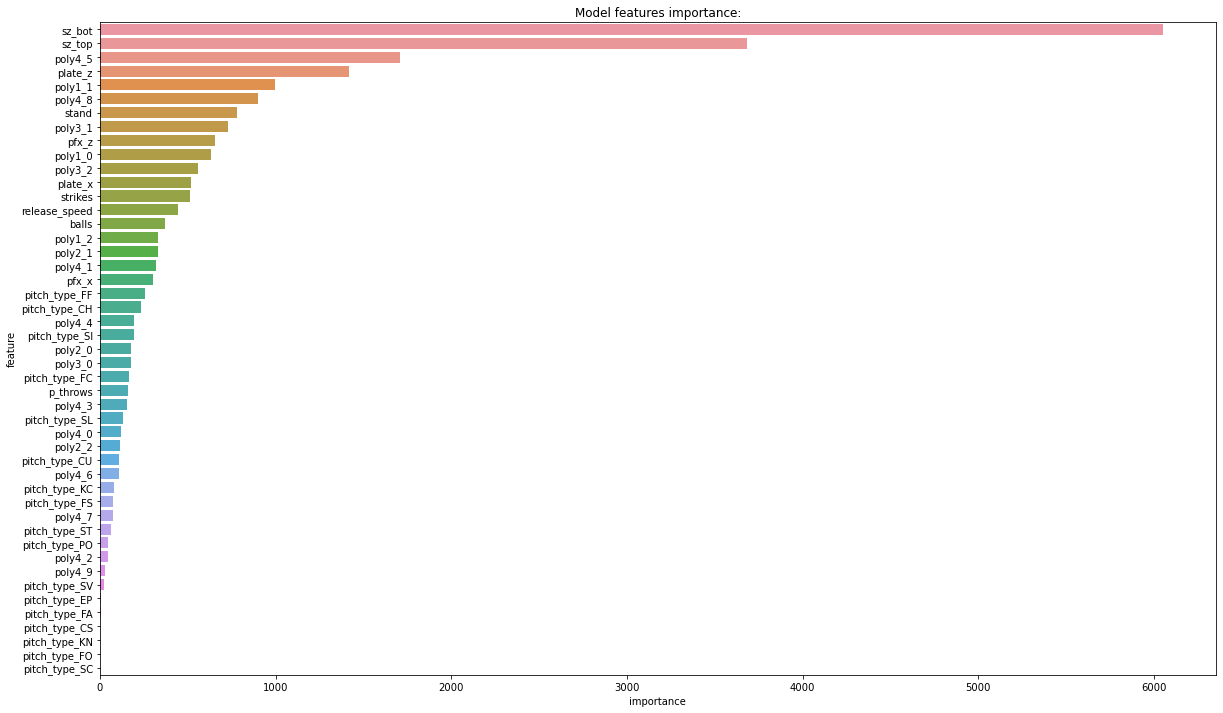

In [142]:
feature_importance_LG = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_LG['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_LG.sort_values(by = ['importance'], ascending = False).head(60))
# Save the plot
plt.savefig('feature_importance_LG.png', dpi=300, bbox_inches='tight')
plt.title('Model features importance:')

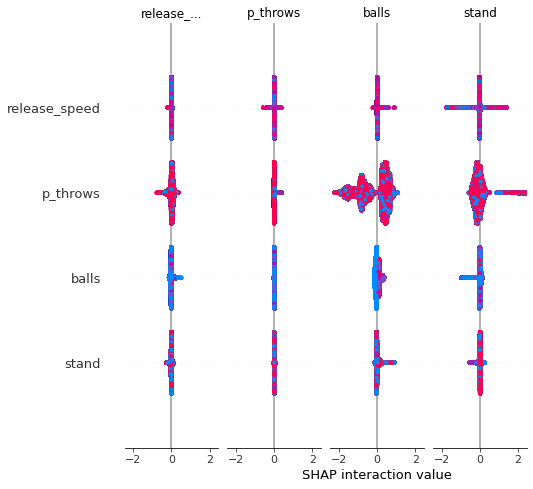

<Figure size 432x288 with 0 Axes>

In [144]:
import shap

# For LGBMClassifie
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
# Plot feature importance
shap.summary_plot(shap_values, X_train,show= False)
plt.savefig('summary_plotLGBM.png')

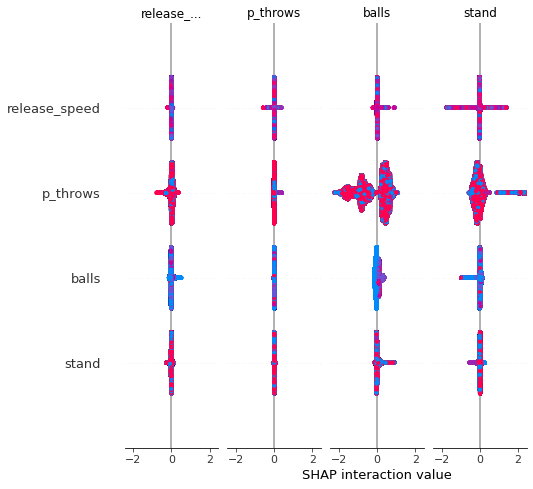

In [149]:
shap.summary_plot(shap_values, X_train, show=False)
plt.savefig('summary_plotLGBM.png')

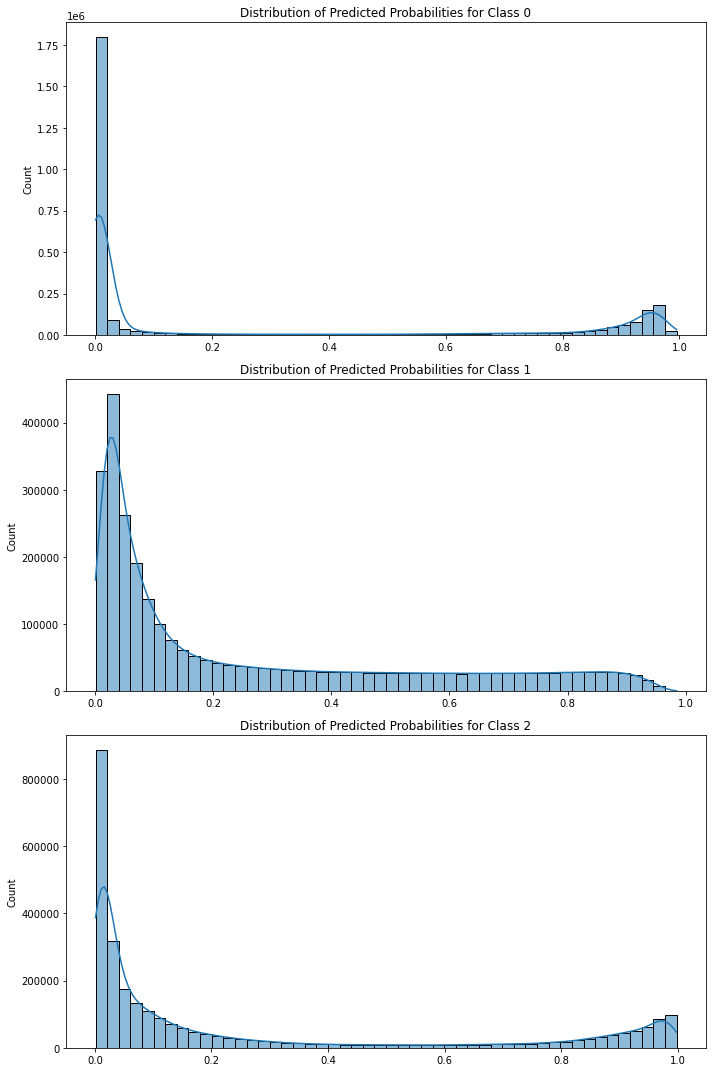

In [145]:
# Convert list of numpy arrays to a single numpy array
all_pred_probs = np.vstack(all_pred_probs)

# Assuming you have a multi-class problem with, e.g., 3 classes
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
for i in range(3):
    sns.histplot(all_pred_probs[:, i], bins=50, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of Predicted Probabilities for Class {i}')
plt.tight_layout()
plt.savefig('predicted_probabilities_distribution fwithout feature interactions.png')
plt.show()


In [146]:
lgb_oof_predictions_p3

[array([[0.62550334, 0.32703272, 0.0094846 , 0.03797934],
        [0.01696256, 0.82537514, 0.02036282, 0.13729948],
        [0.03185606, 0.78232509, 0.01672754, 0.1690913 ],
        ...,
        [0.49668415, 0.43998982, 0.01223086, 0.05109517],
        [0.004185  , 0.16336433, 0.02502004, 0.80743063],
        [0.0321919 , 0.83998888, 0.03502723, 0.09279198]]),
 array([[0.78573582, 0.17026249, 0.01062999, 0.03337169],
        [0.01671895, 0.81654532, 0.02049931, 0.14623642],
        [0.03322001, 0.77593179, 0.01870191, 0.17214628],
        ...,
        [0.635985  , 0.30147718, 0.01248073, 0.0500571 ],
        [0.00438148, 0.16197269, 0.02543993, 0.8082059 ],
        [0.03253917, 0.83900204, 0.03884678, 0.08961201]]),
 array([[0.73640747, 0.20809021, 0.00975355, 0.04574877],
        [0.01756737, 0.83098488, 0.02064393, 0.13080382],
        [0.03377891, 0.80278814, 0.01622491, 0.14720804],
        ...,
        [0.61860434, 0.3146897 , 0.01580939, 0.05089657],
        [0.00409568, 0.156420

In [147]:
print(p3.shape)  # Should show (number_of_instances, number_of_classes)
print(p3[0]) # Check the probability distribution of the first instance

(716869, 4)
[0.85758811 0.09770614 0.01187527 0.03283049]


In [150]:

lgb_sum_probs = np.zeros((len(valid_df), 4))  # 4 being the number of classes
cat_sum_probs = np.zeros((len(valid_df), 4))

for p3 in lgb_oof_predictions_p3:
    lgb_sum_probs += p3

for p4 in cat_oof_predictions_p4:
    cat_sum_probs += p4

lgb_avg_probs = lgb_sum_probs / len(lgb_oof_predictions_p3)
cat_avg_probs = cat_sum_probs / len(cat_oof_predictions_p4)


In [151]:
lgb_avg_probs.shape

(716869, 4)

In [152]:
cat_avg_probs.shape

(716869, 4)

In [153]:
lgb_avg_probs

array([[0.77220334, 0.17969768, 0.0100391 , 0.03805989],
       [0.01777805, 0.82085357, 0.02075932, 0.14060906],
       [0.03412338, 0.79492265, 0.01626221, 0.15469176],
       ...,
       [0.59070491, 0.34826391, 0.01350287, 0.04752832],
       [0.00435271, 0.18326332, 0.02668155, 0.78570242],
       [0.03504599, 0.84143486, 0.03631882, 0.08720033]])

In [154]:
cat_avg_probs

array([[8.20644668e-01, 1.20297930e-01, 3.31602247e-03, 5.57413803e-02],
       [1.58225567e-03, 7.93977566e-01, 8.14569938e-03, 1.96294479e-01],
       [2.05558217e-03, 7.79462568e-01, 4.25796891e-03, 2.14223881e-01],
       ...,
       [9.38299973e-01, 4.21446699e-02, 1.65317854e-03, 1.79021785e-02],
       [4.35242383e-04, 1.15659976e-01, 5.16660105e-02, 8.32238772e-01],
       [1.00378176e-02, 7.83966522e-01, 1.92582600e-02, 1.86737400e-01]])

In [ ]:
# lgb_probs = np.concatenate(lgb_oof_predictions_p3, axis=0)
# cat_probs = np.concatenate(cat_oof_predictions_p4, axis=0)

In [ ]:
# lgb_probs

In [ ]:
# cat_probs

In [ ]:
# cat_probs.shape

In [ ]:
# lgb_probs.shape

## Submission

In [156]:
# Calculate mean probabilities across the two models
mean_probabilities = (lgb_avg_probs + cat_avg_probs) / 2

In [157]:
mean_probabilities

array([[0.796424  , 0.14999781, 0.00667756, 0.04690063],
       [0.00968015, 0.80741557, 0.01445251, 0.16845177],
       [0.01808948, 0.78719261, 0.01026009, 0.18445782],
       ...,
       [0.76450244, 0.19520429, 0.00757802, 0.03271525],
       [0.00239398, 0.14946165, 0.03917378, 0.80897059],
       [0.0225419 , 0.81270069, 0.02778854, 0.13696887]])

In [158]:
# Use argmax to determine the predicted class from mean probabilities
final_predictions = np.argmax(mean_probabilities, axis=1)

In [159]:
final_predictions

array([0, 1, 1, ..., 0, 3, 1], dtype=int64)

In [160]:
final_predictions.shape

(716869,)

In [161]:
unique_classes = np.unique(final_predictions)

# Print the unique class labels found in final_predictions
print("Unique classes in final predictions:", unique_classes)

Unique classes in final predictions: [0 1 2 3]


In [162]:
print("Number of predictions:", len(final_predictions))
print("Number of rows in valid_df:", len(valid_df))


Number of predictions: 716869
Number of rows in valid_df: 716869


In [163]:
# Convert predictions to a pandas Series for easy DataFrame creation
pred_series = pd.Series(final_predictions, name="SwingProbability")



In [164]:
pred_series.head()

0    0
1    1
2    1
3    1
4    3
Name: SwingProbability, dtype: int64

In [165]:

submission = pd.DataFrame({
    "pitch_id": valid_df['pitch_id'],  # So as to make sure 'ID' is the correct name of the identifier column in my submission DataFrame
    "SwingLikelihood": pred_series
})

# Print the head of the DataFrame to check
print(submission.head())

# Save the DataFrame to a CSV file
submission.to_csv('validation3_.csv', index=False)


    pitch_id  SwingLikelihood
0  4135978.0                0
1  4135989.0                1
2  4135993.0                1
3  4131576.0                1
4  4131602.0                3


In [166]:
# Convert predictions to a pandas Series for easy DataFrame creation
pred_series = pd.Series(final_predictions, name="SwingLikelihood")

# Create the submission DataFrame with initial predictions
submission = pd.DataFrame({
    "pitch_id": valid_df['pitch_id'],
    "SwingLikelihood": pred_series
})

# Define mappings for SwingLikelihoodLabel
swing_likelihood_labels = {
    0: 'No Swing',
    1: 'Unlikely Swing',
    2: 'Attempt to Swing (bunt)',
    3: 'Definite Swing'
}

# Map predictions to descriptive labels
submission['SwingLikelihoodLabel'] = submission['SwingLikelihood'].map(swing_likelihood_labels)

# Define SwingProbability based on SwingLikelihood
# Where 0 or 1 are 'No Swing', and 2 or 3 are 'Likely Swing'
submission['SwingProbability'] = submission['SwingLikelihood'].apply(lambda x: 'No Swing' if x in [0, 1] else 'Swing')

# Print the head of the DataFrame to check
print(submission.head())


    pitch_id  SwingLikelihood SwingLikelihoodLabel SwingProbability
0  4135978.0                0             No Swing         No Swing
1  4135989.0                1       Unlikely Swing         No Swing
2  4135993.0                1       Unlikely Swing         No Swing
3  4131576.0                1       Unlikely Swing         No Swing
4  4131602.0                3       Definite Swing            Swing


In [ ]:
# # Convert predictions to a pandas Series for easy DataFrame creation
# pred_series = pd.Series(final_predictions, name="SwingProbability")

# # Create the submission DataFrame with initial predictions
# submission = pd.DataFrame({
#     "pitch_id": valid_df['pitch_id'],
#     "SwingProbability": pred_series
# })

# # Define mappings for SwingProbabilityLabel
# swing_probability_labels = {
#     0: 'No Swing',
#     1: 'Unlikely Swing',
#     2: 'Attempt to Swing (bunt)',
#     3: 'Definite Swing'
# }

# # I mapped predictions to descriptive labels
# submission['SwingProbabilityLabel'] = submission['SwingProbability'].map(swing_probability_labels)

# # Define SwingLikelihood based on SwingProbability
# # Where 0 or 1 are 'Unlikely Swing', and 2 or 3 are 'Likely Swing'
# submission['SwingLikelihood'] = submission['SwingProbability'].apply(lambda x: 'Unlikely Swing' if x in [0, 1] else 'Likely Swing')

# # Print the head of the DataFrame to check
# print(submission.head())


In [167]:
submission.to_csv('validation2_.csv', index=False) # this contains the Pitch ID of year 3 pitches and their predictions

In [168]:
# Check for duplicate pitch_ids
print(validation_data['pitch_id'].duplicated().sum())




0


In [ ]:
# Check the accuracy level and precision and as well the confusion matrix provided the validated y label is available  using thr indented code below .

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# # Assume 'valid_labels' contains the true class labels for the validation data
# true_labels = valid_labels  # This swould be defined 

# # Compute the confusion matrix
# cm = confusion_matrix(true_labels, final_predictions, labels=[0, 1, 2, 3])

# # Compute accuracy
# accuracy = accuracy_score(true_labels, final_predictions)

# # Compute F1 score
# f1 = f1_score(true_labels, final_predictions, average='weighted')

# # Print metrics
# print("Accuracy:", accuracy)
# print("F1 Score:", f1)

# # Plot the confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
# plt.title('Confusion Matrix for Validation Data')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()


In [169]:
df_year3 = pd.read_csv('year3.csv')

In [170]:
df_year3.columns

Index(['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
       'p_throws', 'pitch_type', 'balls', 'strikes', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'sz_top', 'sz_bot'],
      dtype='object')

In [171]:
year3 = pd.read_csv('year3.csv')

In [172]:
# Ensuring there are no missing pitch_id values before creating the DataFrame
valid_data_filtered = validation_data.dropna(subset=['pitch_id'])

# Match predictions with the filtered validation_data
pred_series = pd.Series(final_predictions[:len(valid_data_filtered)], name="SwingLikelihood")

# Create the submission DataFrame using filtered data
submission = pd.DataFrame({
    "pitch_id": valid_data_filtered['pitch_id'].reset_index(drop=True),
    "SwingLikelihood": pred_series
})

# Map predictions to descriptive labels
swing_likelihood_labels = {
    0: 'No Swing',
    1: 'Unlikely Swing',
    2: 'Attempt to Swing (bunt)',
    3: 'Definite Swing'
}
submission['SwingLikelihoodLabel'] = submission['SwingLikelihood'].map(swing_likelihood_labels)

# Define SwingProbability based on SwingLikelihood
submission['SwingProbability'] = submission['SwingLikelihood'].apply(lambda x: 'No Swing' if x in [0, 1] else 'Swing')

# Check and adjust data types for pitch_id
print(submission['pitch_id'].dtype, validation_data['pitch_id'].dtype)
submission['pitch_id'] = submission['pitch_id'].astype(validation_data['pitch_id'].dtype)

# Merge additional columns from validation_data
additional_columns = validation_data[['season', 'pitch_id', 'release_speed', 'batter', 'pitcher', 'stand',
                                      'p_throws', 'balls', 'strikes', 'pfx_x', 'pfx_z',
                                      'plate_x', 'plate_z', 'sz_top', 'sz_bot']] 
submission = submission.merge(additional_columns, on='pitch_id', how='left')

# Rearrange columns so that 'SwingLikelihood', 'SwingLikelihoodLabel', 'SwingProbability' are the last columns
column_order = [col for col in submission.columns if col not in ['SwingLikelihood', 'SwingLikelihoodLabel', 'SwingProbability']] + ['SwingLikelihood', 'SwingLikelihoodLabel', 'SwingProbability']
submission = submission[column_order]

# Check the resulting DataFrame
print("After merging with validation_data:", submission.head())
print("Check for NaNs in key columns:", submission.isnull().sum())

# Remove any rows that might still have missing pitch_id after creation
submission = submission.dropna(subset=['pitch_id'])

# Merge the pitch_type column from year3 into submission
submission = submission.merge(year3[['pitch_id', 'pitch_type']], on='pitch_id', how='left')

# Ensure the pitch_type column is placed correctly right after 'p_throws'
p_throws_index = submission.columns.tolist().index('p_throws') + 1
columns = submission.columns.tolist()
columns.insert(p_throws_index, columns.pop(columns.index('pitch_type')))
submission = submission[columns]

# Replace values in 'stand' and 'p_throws' columns
submission['stand'] = submission['stand'].map({1: 'R', -1: 'L'})
submission['p_throws'] = submission['p_throws'].map({1: 'R', -1: 'L'})

# Remove any rows that might still have missing pitch_id after creation
submission = submission.dropna(subset=['pitch_id'])

# Print the cleaned submission head
print(submission.head())


float64 float64
After merging with validation_data:     pitch_id  season  release_speed  batter  pitcher  stand  p_throws  balls  \
0  4135978.0       3      78.800003    5464     6936     -1         1      1   
1  4135989.0       3      93.699997    5464     6936     -1         1      2   
2  4135993.0       3      94.199997    5464     6936     -1         1      3   
3  4131576.0       3      91.199997    6446     6727      1         1      0   
4  4131602.0       3      84.500000    5667     6727      1         1      3   

   strikes  pfx_x  pfx_z  plate_x  plate_z  sz_top  sz_bot  SwingLikelihood  \
0        1   1.11   0.30    -0.33     0.49    3.58    1.66                0   
1        2  -1.16   1.36    -1.57     2.49    3.58    1.69                1   
2        2  -1.24   1.26    -1.31     3.48    3.68    1.69                1   
3        0  -1.03   1.38     1.02     2.31    3.29    1.58                1   
4        2   0.20   0.12     0.61     1.36    3.41    1.63              

In [173]:
# Check unique values and missing pitch_id
print("Unique pitch_ids in submission:", submission['pitch_id'].nunique())
print("Unique pitch_ids in validation_data:", validation_data['pitch_id'].nunique())
print("Missing pitch_id in submission:", submission['pitch_id'].isna().sum())
print("Missing pitch_id in validation_data:", validation_data['pitch_id'].isna().sum())


Unique pitch_ids in submission: 716869
Unique pitch_ids in validation_data: 716869
Missing pitch_id in submission: 0
Missing pitch_id in validation_data: 0


In [174]:
submission.to_csv('validation_.csv', index=False)

##  Defining The Middle Middle Pitches 

Center of the strike zone is the area over home plate from the midpoint between a batter's shoulders and the top of his pants, down to the hollow beneath his kneecap. The exact center of this zone in terms of width (plate_x) is typically around 0 (right over the middle of the home plate), while the center in terms of height (plate_z) is halfway between sz_top (top of the strike zone) and sz_bot (bottom of the strike zone).
Using the range of 0.5 ft to specify a pitch to be within 0.5 feet of the center, what this mean is defining a radius around the point that is considered 'central' enough to fall within middle middle pitch of the strike zone. In doing this I break this down into a ±0.25 feet range which allows for a understanding the position of the pitch:


# 1. Horizontal Center: 
plate_x would be equal to 0 i.e plate_x  == 0 means the pitch is right over the center line of the plate. So i will use the ±0.25 feet, which means the pitch can be up to 0.25 feet to the left or right of this line.

# 2. Vertical Center: 
Then I calculated the midpoint as (sz_top + sz_bot) / 2  which gives the vertical center. Similarly, ±0.25 feet means the pitch can be up to 0.25 feet above or below this midpoint.

# A pitch is middle-middle wpould be in the area below: 

Center of the Strike Zone: The horizontal center (plate_x) is typically around 0 (the middle of the home plate), and the vertical center (plate_z) would be halfway between sz_top (top of the strike zone) and sz_bot (bottom of the strike zone).

# Middle-Middle criteria I resolved to is:
A pitch that is within ±0.25 feet of the horizontal center (plate_x == 0).

and A pitch that is within ±0.25 feet of the vertical center, calculated as (sz_top + sz_bot) / 2.

# Approach  and Implementation of getting the  Middle Middle Pitches Defining The Middle Middle Pitches

Filtering the dataset for middle-middle pitches based on the criteria 

In [175]:
middle_middle_mask = (
    (np.abs(train_df['plate_x']) <= 0.25) &
    (np.abs(train_df['plate_z'] - (train_df['sz_top'] + train_df['sz_bot']) / 2) <= 0.25)
)
middle_middle_df = train_df[middle_middle_mask]


In [176]:
middle_middle_df.head()

,pitch_id,release_speed,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType,pitch_type_CH,pitch_type_CS,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FS,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_ST,pitch_type_SV,pitch_type_FO,poly1_0,poly1_1,poly1_2,poly2_0,poly2_1,poly2_2,poly3_0,poly3_1,poly3_2,poly4_0,poly4_1,poly4_2,poly4_3,poly4_4,poly4_5,poly4_6,poly4_7,poly4_8,poly4_9
6,2697712.0,95.400002,1,1,0,0,-0.58,0.98,-0.16,2.36,3.41,1.56,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,-0.58,0.98,-0.5684,-0.16,2.36,-0.3776,-0.16,2.36,-0.16,2.36,-0.3776,0.0256,-0.3776,-0.3776,5.5696,-0.3776
32,2699929.0,83.000000,1,-1,3,2,-1.71,-0.34,0.20,2.47,3.55,1.63,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.0,2.0,6.0,-1.71,-0.34,0.5814,0.20,2.47,0.4940,0.20,2.47,0.20,2.47,0.4940,0.0400,0.4940,0.4940,6.1009,0.4940
34,2697754.0,95.199997,1,1,1,0,-0.20,0.72,-0.07,2.44,3.41,1.56,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,-0.20,0.72,-0.1440,-0.07,2.44,-0.1708,-0.07,2.44,-0.07,2.44,-0.1708,0.0049,-0.1708,-0.1708,5.9536,-0.1708
52,2699838.0,91.400002,1,1,0,0,-1.25,1.15,-0.15,2.66,3.37,1.53,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,-1.25,1.15,-1.4375,-0.15,2.66,-0.3990,-0.15,2.66,-0.15,2.66,-0.3990,0.0225,-0.3990,-0.3990,7.0756,-0.3990
56,2697844.0,73.900002,1,-1,1,1,0.13,-0.93,-0.02,2.68,3.43,1.67,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0.13,-0.93,-0.1209,-0.02,2.68,-0.0536,-0.02,2.68,-0.02,2.68,-0.0536,0.0004,-0.0536,-0.0536,7.1824,-0.0536


In [177]:
middle_middle_df.shape

(71240, 49)

In [178]:
middle_middle_df['release_speed'].max()

103.8000031

In [179]:
middle_middle_df['release_speed'].min()

41.90000153

In [180]:


X_m_m= middle_middle_df[['release_speed', 'stand','p_throws', 'balls', 'strikes', 'pfx_x',
                          'pfx_z', 'plate_x', 'plate_z', 'sz_top', 'sz_bot', 'pitch_type_CH',
                          'pitch_type_CS', 'pitch_type_CU', 'pitch_type_EP', 'pitch_type_FA',
                          'pitch_type_FC', 'pitch_type_FF', 'pitch_type_FS', 'pitch_type_KC',
                          'pitch_type_KN', 'pitch_type_PO', 'pitch_type_SC', 'pitch_type_SI',
                          'pitch_type_SL', 'pitch_type_ST', 'pitch_type_SV', 'pitch_type_FO',
                          'poly1_0', 'poly1_1', 'poly1_2', 'poly2_0', 'poly2_1', 'poly2_2',
                          'poly3_0', 'poly3_1', 'poly3_2', 'poly4_0', 'poly4_1', 'poly4_2',
                          'poly4_3', 'poly4_4', 'poly4_5', 'poly4_6', 'poly4_7', 'poly4_8',
                          'poly4_9']]# 
y_m_m = middle_middle_df['SwingType']  

In [181]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_m, y_m = sm.fit_resample(X_m_m, y_m_m)

In [182]:
m_m_oof_f1=[]
m_m_oof_predictions=[]

params = {'learning_rate': 0.3,
         'subsample': 0.7845527188607021,
         'colsample_bytree': 0.6474680443294045,
         'max_depth': 5,
         'scale_pos_weight': 1}

fold=StratifiedKFold(n_splits=10)#15#5#10

i=1
for train_index_m, test_index_m in fold.split(X_m,y_m):
        
    X_train_m, X_test_m = X_m.iloc[train_index_m], X_m.iloc[test_index_m]
    y_train_m, y_test_m = y_m.iloc[train_index_m], y_m.iloc[test_index_m]

    model = LGBMClassifier(**params, n_estimators=200)

    model.fit(X_train_m,y_train_m,eval_set=[(X_train_m,y_train_m),(X_test_m, y_test_m)], early_stopping_rounds=200, verbose = False)#early_ stoppoing 1000
    preds=model.predict(X_test_m)

    print(f"F1, fold {i}: {f1_score(y_test_m, preds, average='weighted')}")
    i+=1                
    m_m_oof_f1.append(f1_score(y_test_m,preds,average='weighted'))
    # p2 = model.predict_proba(valid_df[features])[:, -1]
    # oof_predictions.append(p2)
    

print(np.mean(m_m_oof_f1))

F1, fold 1: 0.8144555199099999
F1, fold 2: 0.8291776934170949
F1, fold 3: 0.8282556712949252
F1, fold 4: 0.9887897674887223
F1, fold 5: 0.9876918907493634
F1, fold 6: 0.9364417588980721
F1, fold 7: 0.9168535508143217
F1, fold 8: 0.9209003629437732
F1, fold 9: 0.9135115853629043
F1, fold 10: 0.910020357077364
0.9046098157956541


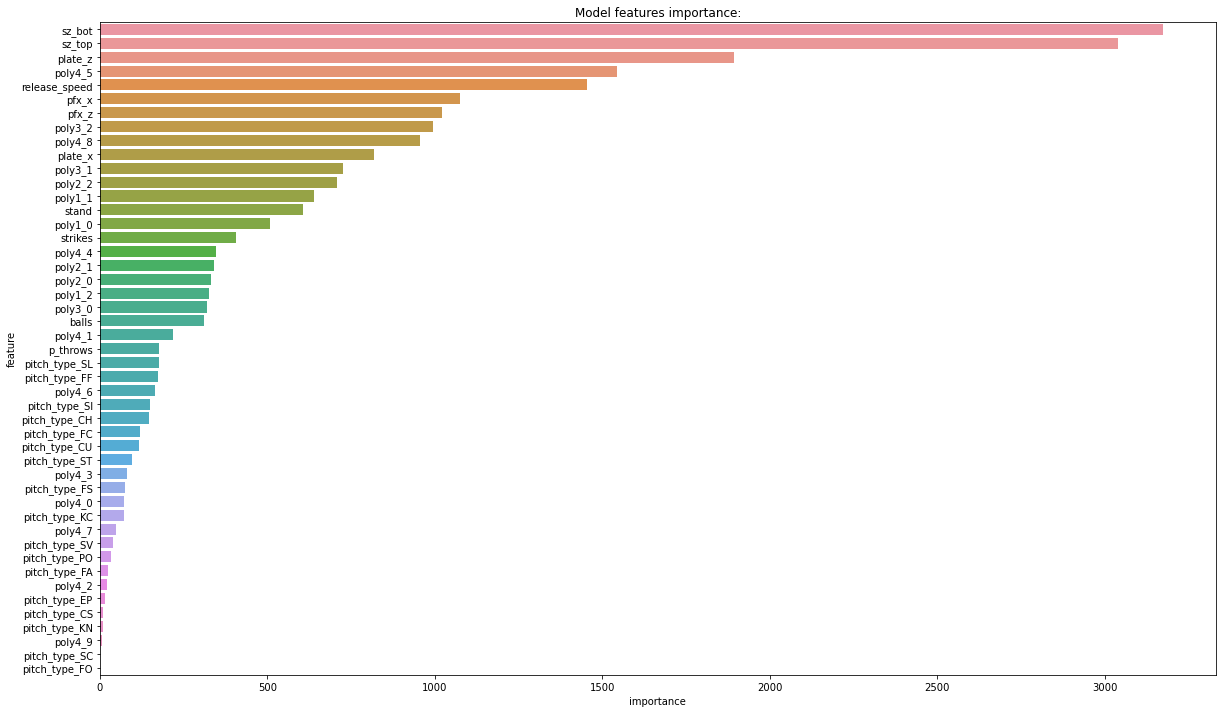

In [183]:
feature_importance_df_m = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df_m['feature'] = X_m_m.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('Model features importance:')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [184]:
new_feat_m = feature_importance_df_m.sort_values(by = ['importance'], ascending = False).head(16)['feature'].to_list()
new_feat_m

['sz_bot',
 'sz_top',
 'release_speed',
 'poly4_5',
 'pfx_z',
 'poly2_2',
 'pfx_x',
 'plate_z',
 'plate_x',
 'poly3_2',
 'poly1_1',
 'poly1_0',
 'strikes',
 'poly1_2',
 'stand',
 'poly2_1']

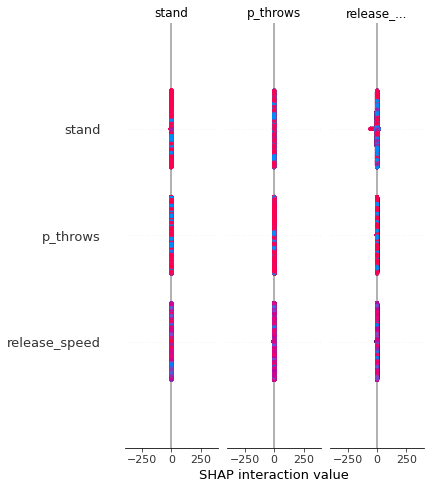

In [185]:
import shap

# For LGBMClassifie
explainer_m_m = shap.TreeExplainer(model)
shap_values = explainer_m_m.shap_values(X_train_m)
# Plot feature importance
shap.summary_plot(shap_values, X_train_m,show= False)
plt.savefig('summary_plot_m_m.png')

I define a meaningful metric based on swing probability(No Swing and Swing Likely). The metric I want to use is called Swing Decision Efficiency (SDE). This metric will evaluate how well a player’s decision to swing correlates with optimal outcomes (such as hitting or avoiding bad pitches).

# Swing Decision Efficiency (SDE) is defined as:

Positive Swing Decision (PSD): The probability of swinging at a pitch that ends up being in a favorable zone (like middle-middle, using the definition I did) or results in a hit/favorable outcome.

Negative Swing Decision (NSD): The probability of swinging at a pitch that ends up being in an unfavorable zone or results in a negative outcome (strikeout, poor hit).

The SDE for a player could then be calculated as:

   # SDE = PSD/(PSD+NSD)

This ratio will give a value between 0 and 1, where 1 indicates perfect swing decision-making, and 0 indicates very poor Swing decision-making.



In [186]:
df_year2 = pd.read_csv('year2.csv')  

In [187]:
def classify_swing_type(description):
    if description in ['foul', 'hit_into_play', 'swinging_strike', 'foul_tip', 'swinging_strike_blocked', 'foul_pitchout']:
        return 'Definite Swing'
    elif description in ['ball', 'called_strike']:
        return 'Unlikely Swing'
    elif description in ['blocked_ball', 'hit_by_pitch', 'pitchout']:
        return 'No Swing'
    elif description in ['foul_bunt', 'missed_bunt', 'bunt_foul_tip']:
        return 'Attempt to Swing (bunt)'

# Apply the function
df_year2['SwingType'] = df_year2['description'].apply(classify_swing_type)

In [188]:
df_year2['SwingType'].unique()

array(['Unlikely Swing', 'Definite Swing', 'No Swing',
       'Attempt to Swing (bunt)'], dtype=object)

In [189]:
df_year2.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType
0,2,3398682.0,93.000000,6351,5763,ball,L,R,FF,2,1,-1.08,0.68,-1.04,4.14,3.30,1.48,Unlikely Swing
1,2,3398692.0,87.800003,6351,5763,ball,L,R,SL,3,2,0.80,0.06,2.16,1.38,3.32,1.51,Unlikely Swing
2,2,3398660.0,87.099998,6859,6222,ball,R,R,SL,1,0,0.49,0.44,0.05,3.53,3.23,1.47,Unlikely Swing
3,2,3398685.0,94.400002,6859,6222,called_strike,R,R,FF,3,1,-0.50,1.39,0.70,2.19,3.20,1.33,Unlikely Swing
4,2,3398652.0,88.300003,6411,6222,called_strike,L,R,CH,0,0,-0.98,0.30,0.51,2.15,3.66,1.74,Unlikely Swing


In [190]:
def classify_swing_likelihood(SwingType):
    if SwingType in ['Definite Swing', 'Attempt to Swing (bunt)']:
        return 'Swing Likely'
    elif SwingType in ['Unlikely Swing', 'No Swing']:
        return 'No Swing'

# Apply the function to create a new column for Swing Likelihood
df_year2['SwingLikelihood'] = df_year2['SwingType'].apply(classify_swing_likelihood)

In [191]:
# the classification function for my  Swing Decision Efficiency (SDE)
def classify_swing(row):
    if row['SwingLikelihood'] == 'Swing Likely':
        return 'PSD'
    elif row['SwingLikelihood'] == 'No Swing':
        return 'NSD'
    return None  

# Apply the  function
df_year2['SwingLikelihood'] = df_year2.apply(classify_swing, axis=1)

In [192]:
df_year2.head()

,season,pitch_id,release_speed,batter,pitcher,description,stand,p_throws,pitch_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,sz_top,sz_bot,SwingType,SwingLikelihood
0,2,3398682.0,93.000000,6351,5763,ball,L,R,FF,2,1,-1.08,0.68,-1.04,4.14,3.30,1.48,Unlikely Swing,NSD
1,2,3398692.0,87.800003,6351,5763,ball,L,R,SL,3,2,0.80,0.06,2.16,1.38,3.32,1.51,Unlikely Swing,NSD
2,2,3398660.0,87.099998,6859,6222,ball,R,R,SL,1,0,0.49,0.44,0.05,3.53,3.23,1.47,Unlikely Swing,NSD
3,2,3398685.0,94.400002,6859,6222,called_strike,R,R,FF,3,1,-0.50,1.39,0.70,2.19,3.20,1.33,Unlikely Swing,NSD
4,2,3398652.0,88.300003,6411,6222,called_strike,L,R,CH,0,0,-0.98,0.30,0.51,2.15,3.66,1.74,Unlikely Swing,NSD


In [193]:
# Aggregate the results by player
swing_decisions = df_year2.groupby('batter')['SwingLikelihood'].value_counts(normalize=True).unstack(fill_value=0)
swing_decisions.head()

SwingLikelihood,NSD,PSD
batter,,
5001,0.517690,0.482310
5002,0.497870,0.502130
5008,0.413793,0.586207
5009,0.431937,0.568063
5015,0.519393,0.480607


In [194]:
#  calculate SDE (Swing Decision Efficiency)
swing_decisions['SDE'] = swing_decisions['PSD'] / (swing_decisions['PSD'] + swing_decisions['NSD'])
swing_decisions['SDE'].head()


batter
5001    0.482310
5002    0.502130
5008    0.586207
5009    0.568063
5015    0.480607
Name: SDE, dtype: float64

In [195]:
# Display the top and bottom 10 players based on SDE metric
top_10_players = swing_decisions['SDE'].nlargest(10)
bottom_10_players = swing_decisions['SDE'].nsmallest(10)

# Print results
print("Top 10 Players by Swing Decision Efficiency (SDE): i.e very perfect swing decision-making")
print(top_10_players)
print("\nBottom 10 Players by Swing Decision Efficiency (SDE) i.e very poor swing decision-making:")
print(bottom_10_players)

Top 10 Players by Swing Decision Efficiency (SDE): i.e very perfect swing decision-making
batter
5240    0.777778
6429    0.692308
6561    0.666667
5325    0.660000
6210    0.650000
6854    0.645161
6831    0.635802
7122    0.633333
6039    0.632000
6847    0.627907
Name: SDE, dtype: float64

Bottom 10 Players by Swing Decision Efficiency (SDE) i.e very poor swing decision-making:
batter
5803    0.000000
5890    0.000000
6783    0.250000
7057    0.275862
6497    0.294118
6274    0.307692
7042    0.315789
5696    0.317073
5569    0.321598
5376    0.333333
Name: SDE, dtype: float64


In [196]:
def save_table_as_image(df, filename, title):
    fig, ax = plt.subplots(figsize=(8, 2 + 0.5 * len(df)))  # Adjust size for table
    ax.axis('off')  # Hide axes
    table_data = df.reset_index()  # Reset index to get players into the table as a column
    table = ax.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size as necessary
    table.scale(1.2, 1.2)  # Adjust scaling to fit the figure
    ax.set_title(title, fontweight='bold', pad=15)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Save the top and bottom 10 players' tables as images
save_table_as_image(top_10_players, 'top_10_players.png', 'Top 10 Players by SDE')
save_table_as_image(bottom_10_players, 'bottom_10_players.png', 'Bottom 10 Players by SDE')
